Pandas 과제
- ***를 채워주세요!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
titanic = sns.load_dataset('titanic')
print("titanic 변수 type: ", type(titanic))

titanic 변수 type:  <class 'pandas.core.frame.DataFrame'>


실습에서 진행했던 것 처럼, 대부분의 경우 csv파일 등 외부 파일에서 데이터를 불러와 사용하게 됩니다.<br>
그게 아니라면 리스트나 딕셔너리 형태로 만든 데이터를 데이터프레임으로 변환하고요.<br>

이번 과제에서는 타이타닉이라는, Seaborn 라이브러리에 내장된 데이터셋을 불러와서 사용할 겁니다.(다음 차시에서 또 쓸 거에요!)

# 데이터 확인 
## 데이터 확인 파트는 코드를 작동만 해보세요!!

In [2]:
data = titanic
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
data.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [4]:
data.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [5]:
print("DataFrame 크기: ", titanic.shape)

DataFrame 크기:  (891, 15)


In [6]:
value_counts = data["survived"].value_counts()
print(value_counts)

survived
0    549
1    342
Name: count, dtype: int64


데이터의 개형을 간단하게 확인해봤습니다.<br>
이제 배운 내용을 활용해봅시다!

# 데이터 추출
## 열 단위 추출하기 - 단일 칼럼

### 인덱싱을 활용해 survived 칼럼을 추출하기

In [7]:
# 추출한 데이터를 surv라는 새로운 변수에 할당해보아요
# 코드의 형태는 **** = ****['********']
surv= data['survived']

#잘 저장되었는지 확인해보고, 저장된 데이터의 데이터타입을 확인해보아요
print(surv)
type(surv)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64


pandas.core.series.Series

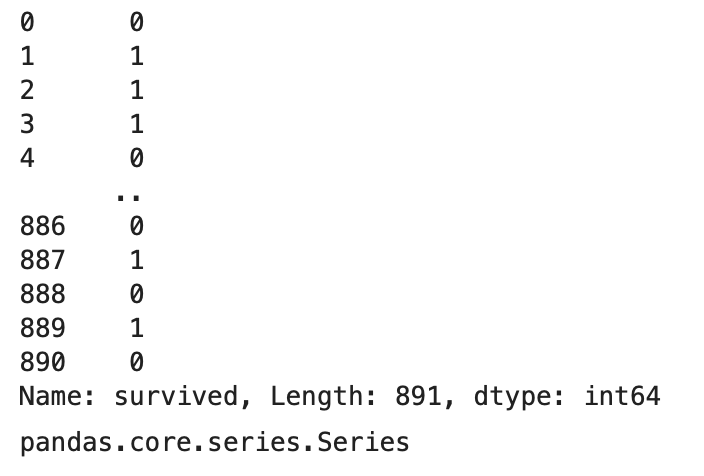

단일 칼럼에 인덱싱을 사용할 경우, 값이 시리즈 형태로 반환된다는 사실을 알 수 있어요.

동일한 결과를 loc과 iloc을 사용해서도 얻어보아요

### loc을 사용해 survived 열 추출하기

In [8]:
# loc을 사용해서도 단일 열을 추출할 수 있어요
# 데이터프레임.loc[ 행, 열 ]의 구조를 사용하면 됩니다.
# 행 전체를 가져오고 싶을 때에는 행 자리에 :를 넣으면 돼요
surv1 = data.loc[:,'survived']

print(surv1)
type(surv1)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64


pandas.core.series.Series

위와 정확히 동일한 결과가 나오면 정답!

### iloc을 사용해 survived 열 추출하기

In [9]:
# iloc은 이름으로 동작하는 loc과 달리 정수형 인덱스 번호가 와야해요
# 다른 구조는 loc과 동일하나, 열을 넣을 자리에 'survived'대신 숫자를 입력해야합니다.
# 번호는 왼쪽에서부터 칼럼을 세어서 0, 1, 2, ... 순으로 매겨집니다.
# 그럼 이제 survived 칼럼을 iloc을 사용해 추출해봅시다!
surv2 = data.iloc[:,0]

print(surv2)
type(surv2)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64


pandas.core.series.Series

인덱싱과 결과는 동일합니다!

### (추가) 만약 단일 칼럼을 인덱싱해야하지만, 데이터프레임 형태를 유지하려면?

 1. 인덱싱의 경우, 전달하는 칼럼 명을 대괄호로 한번 더 감싸, 리스트 형태로 전달
 - surv = data[[]'survived']]
 2. loc도 마찬가지, 이를 Fancy 인덱싱이라고 부른다.
 - surv1 = data.loc[:, ['survived']]
 3. iloc은 loc과 동일하다.
 - surv2 = data.iloc[:, ['survived']]

In [10]:
# 인덱싱 사용해 데이터프레임 형태로 가져오기
surv = data[['survived']]
surv

survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]

결과의 형태가 아까와는 다르죠? 데이터프레임 타입으로 가져와서 그렇습니다

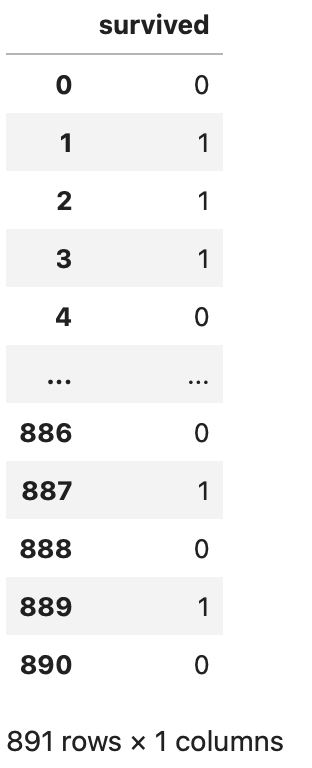

In [11]:
# loc 사용해 데이터프레임 형태로 가져오기
surv1 = data.loc[:,['survived']]
surv1

survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]

인덱싱과 동일한 결과가 나오면 정답!

In [12]:
# iloc 사용해 데이터프레임 형태로 가져오기
surv2 = data.iloc[:,[0]]
surv2

survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]

인덱싱과 동일한 결과가 나오면 정답!

In [13]:
# type()함수를 사용해 정말 데이터프레임 형태로 가져왔는지 확인해봅시다
print(type(surv), type(surv1), type(surv2))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


전부 데이터 프레임 형태로 바뀐 것을 확인할 수 있습니다.

## 열 단위 추출 - 다중 칼럼

### 인덱싱을 활용해 'age', 'sibsp', 'parch' 열 추출하기

인덱싱을 통해서도 여러 칼럼을 동시에 추출할 수 있습니다.

[주의사항]<br>
두 개 이상의 칼럼을 동시에 인덱싱하려면, 반드시 리스트 형태로 자료를 제공해야 합니다.<br>
예를 들어, 'age', 'sibsp', 'parch' 세 칼럼을 추출하려면, 이들을 ['age', 'sibsp', 'parch']와 같이 대괄호로 묶어 인덱싱해야 합니다.


[오류가 발생하는 경우]<br>
만약 대괄호를 추가하지 않고, 'age', 'sibsp', 'parch' 형태로 전달하면 오류가 발생합니다.<br>
이는 'age'와 'sibsp'와 'parch' 각각의 열을 탐색하는 것이 아니라, 'age', 'sibsp', 'parch'라는 하나의 이름을 가진 열을 탐색하라고 명령한 것이기 때문입니다.

In [16]:
#인덱싱을 사용해 다중 칼럼을 추출해봅시다

df = data[['age','sibsp','parch']]
df

age  sibsp  parch
0    22.0      1      0
1    38.0      1      0
2    26.0      0      0
3    35.0      1      0
4    35.0      0      0
..    ...    ...    ...
886  27.0      0      0
887  19.0      0      0
888   NaN      1      2
889  26.0      0      0
890  32.0      0      0

[891 rows x 3 columns]

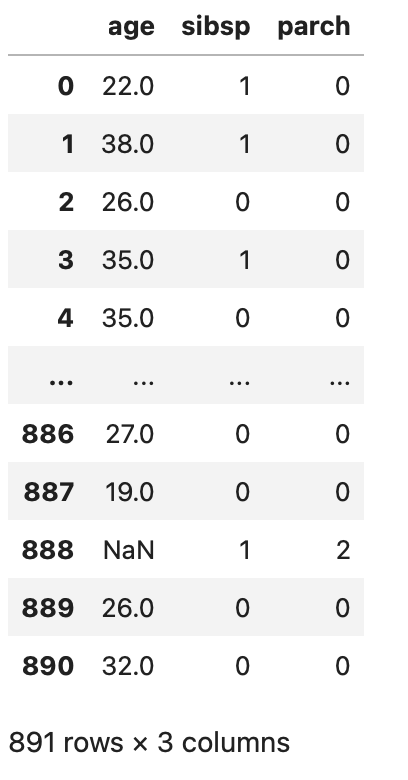

*참고 : 대괄호를 한 번 씌우면 벌어지는 일

여러개의 열을 전달하려면, 열을 리스트 형태로 요청을 해야 합니다. ["pclass", "age"]<br>
지금 상태는 "pclass"와 "age"라는 두 개의 열을 요청한 것이 아니라, ("pclass","age")라는 하나의 열을 요청한 것으로 인식됩니다.<br>
그렇기 때문에 KeyError가 발생한 것입니다.

In [17]:
# 여러개의 열을 인덱싱할 때 괄호를 한 번 씌우면 오류 발생
# 하단의 코드에서 #를 없애고 작동시켜보세요!

data["pclass", "age"]

KeyError: ('pclass', 'age')

### loc 사용하기

In [19]:
#단일 칼럼 추출과 거의 비슷하나, 열 이름을 리스트 형태로 제공해야 한다는 점에 차이가 있습니다.
# loc과 iloc에서 전체 행을 가져오려면 어떻게 했어야했죠?

df1 = data.loc[:,['age','sibsp','parch']]
df1

age  sibsp  parch
0    22.0      1      0
1    38.0      1      0
2    26.0      0      0
3    35.0      1      0
4    35.0      0      0
..    ...    ...    ...
886  27.0      0      0
887  19.0      0      0
888   NaN      1      2
889  26.0      0      0
890  32.0      0      0

[891 rows x 3 columns]

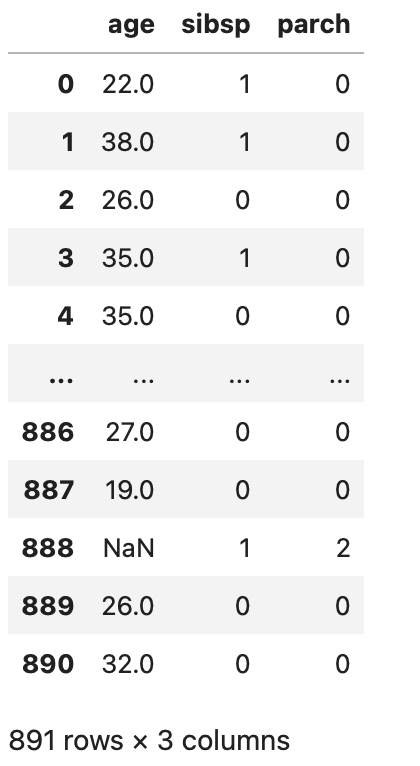

### iloc 사용하기

iloc 역시 크게 다르지 않아요<br>다만 차이점이 있다면, iloc은 칼럼 정보 인지 부분을 리스트로 전달해서는 안돼요

> 참고) loc에서도 열 단위 추출에 슬라이싱을 사용할 수 있습니다.<br>
> 다만 차이점은 iloc은 3번째 부터 6번째 전까지라는 범위를 제공해주는 것이지만(data.iloc[:, 3:6])<br>
> loc을 사용하여 슬라이싱하는 경우에는 그 이름을 직접적으로 제공해주어야합니다(data.loc[:, 'age':'parch'])

In [24]:
#슬라이싱을 사용해 칼럼을 추출해보세요!

df2 = data.iloc[:,3:6]
df2

age  sibsp  parch
0    22.0      1      0
1    38.0      1      0
2    26.0      0      0
3    35.0      1      0
4    35.0      0      0
..    ...    ...    ...
886  27.0      0      0
887  19.0      0      0
888   NaN      1      2
889  26.0      0      0
890  32.0      0      0

[891 rows x 3 columns]

loc과 동일한 결과가 나오면 정답!

## 행단위 추출하기

### 슬라이싱 활용해 101~200번째 행을 추출하기

슬라이싱은 범위를 지정해 여러 항목을 추출할 때 사용합니다.<br>
슬라이싱은 start와 end 포인트 값을 제공해주어야 하고, 이 사이에 : 를 붙입니다.<br>
슬라이싱은 iloc처럼 번호를 기준으로 작동하며, 끝 인덱스는 포함되지 않는다는 특징이 있습니다.<br>
따라서 7번째 칼럼까지 추출하고 싶다면, 7+1 =8을 엔드 포인트로 제공해야합니다.

In [25]:
df = data[101:201]
df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
101         0       3    male   NaN      0      0   7.8958        S   Third   
102         0       1    male  21.0      0      1  77.2875        S   First   
103         0       3    male  33.0      0      0   8.6542        S   Third   
104         0       3    male  37.0      2      0   7.9250        S   Third   
105         0       3    male  28.0      0      0   7.8958        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
196         0       3    male   NaN      0      0   7.7500        Q   Third   
197         0       3    male  42.0      0      1   8.4042        S   Third   
198         1       3  female   NaN      0      0   7.7500        Q   Third   
199         0       2  female  24.0      0      0  13.0000        S  Second   
200         0       3    male  28.0      0      0   9.5000        S   Third   

       who  adult_male deck  embark_town alive  alone  
101    man        True  NaN  Southampton    no   True  
102    man        True    D  Southampton    no  False  
103    man        True  NaN  Southampton    no   True  
104    man        True  NaN  Southampton    no  False  
105    man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
196    man        True  NaN   Queenstown    no   True  
197    man        True  NaN  Southampton    no  False  
198  woman       False  NaN   Queenstown   yes   True  
199  woman       False  NaN  Southampton    no   True  
200    man        True  NaN  Southampton    no   True  

[100 rows x 15 columns]

이런 식으로 나오면 성공!

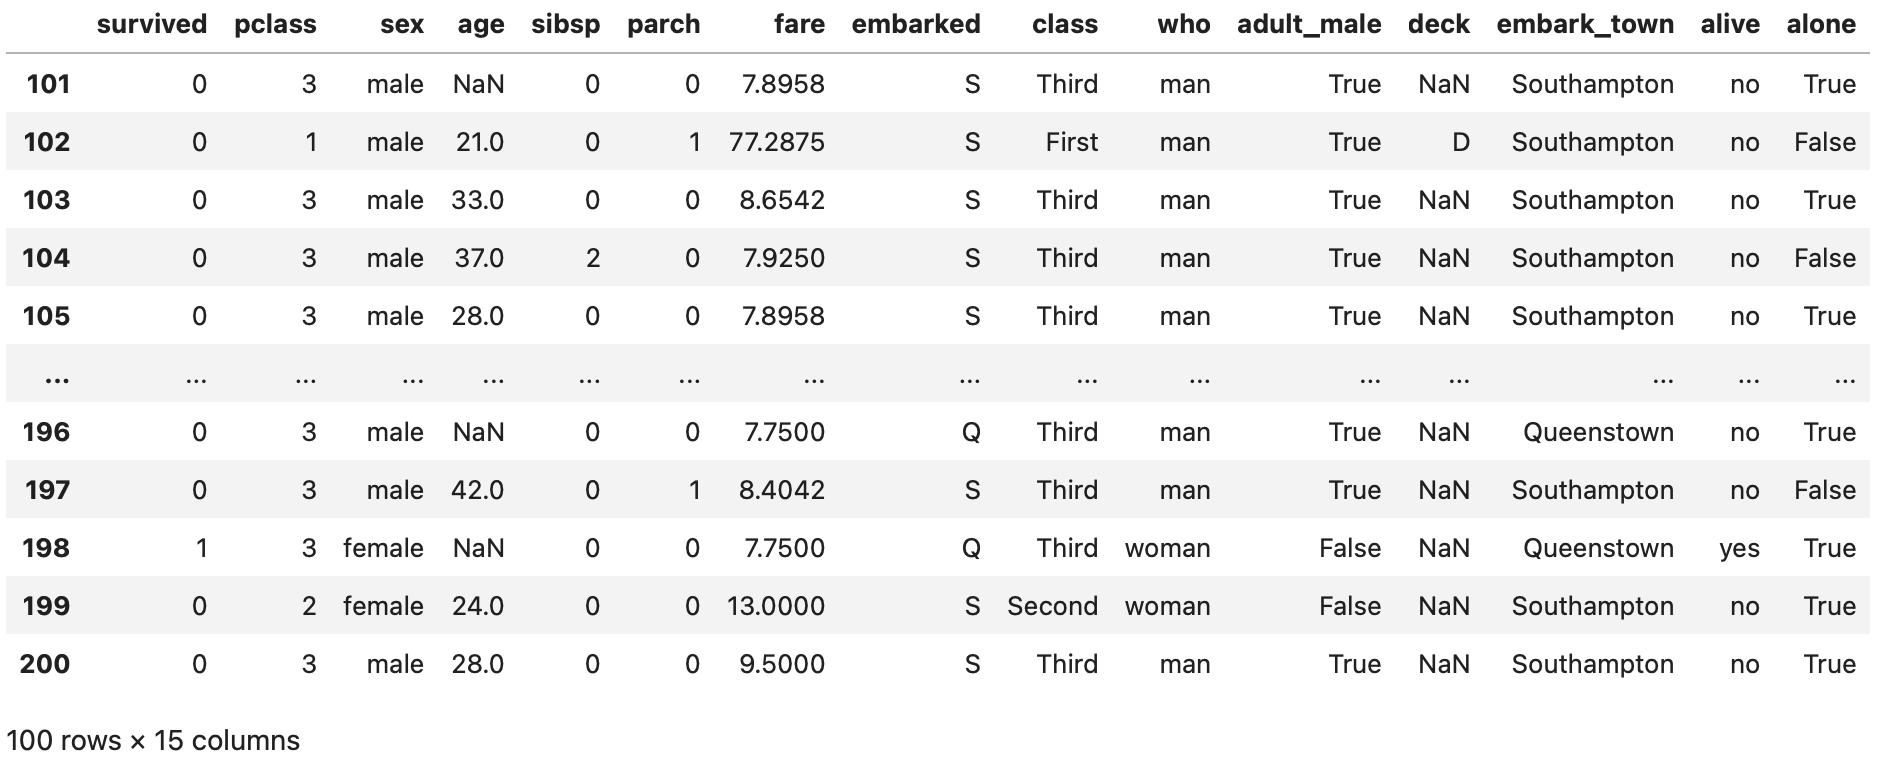

### loc을 이용해 201~300번째 행을 추출하기

**loc**은 인덱싱과 슬라이싱이 모두 가능합니다.  
하지만 일반적인 슬라이싱과 달리, 슬라이싱의 끝 인덱스에 해당하는 값까지 포함해서 가져옵니다.  
이러한 차이는 loc이 이름을 기준으로 슬라이싱하고, iloc은 번호를 기준으로 하기 때문에 발생합니다.

행과 열 추출   
열을 추출할 때는 ['행', '열'] 형태로 작성합니다. 만약 전체 행을 대상으로 하려면 앞에 :를 붙여 [:, '열']처럼 명시해야 합니다.  
반면, 특정 행 구간만 추출할 때는 뒤에 :를 붙여 전체 열을 대상으로 한다는 것을 명시해도 되고, 생략해도 동일한 결과를 얻습니다.  

df_row1 = data.loc[201:300, :]  # 열 전체를 명시적으로 지정  
df_row2 = data.loc[201:300]      # 열 전체를 생략 (동일한 결과)

In [29]:
df1 = data.loc[201:300,]
df1

survived  pclass     sex   age  sibsp  parch      fare embarked  class  \
201         0       3    male   NaN      8      2   69.5500        S  Third   
202         0       3    male  34.0      0      0    6.4958        S  Third   
203         0       3    male  45.5      0      0    7.2250        C  Third   
204         1       3    male  18.0      0      0    8.0500        S  Third   
205         0       3  female   2.0      0      1   10.4625        S  Third   
..        ...     ...     ...   ...    ...    ...       ...      ...    ...   
296         0       3    male  23.5      0      0    7.2292        C  Third   
297         0       1  female   2.0      1      2  151.5500        S  First   
298         1       1    male   NaN      0      0   30.5000        S  First   
299         1       1  female  50.0      0      1  247.5208        C  First   
300         1       3  female   NaN      0      0    7.7500        Q  Third   

       who  adult_male deck  embark_town alive  alone  
201    man        True  NaN  Southampton    no  False  
202    man        True  NaN  Southampton    no   True  
203    man        True  NaN    Cherbourg    no   True  
204    man        True  NaN  Southampton   yes   True  
205  child       False    G  Southampton    no  False  
..     ...         ...  ...          ...   ...    ...  
296    man        True  NaN    Cherbourg    no   True  
297  child       False    C  Southampton    no  False  
298    man        True    C  Southampton   yes   True  
299  woman       False    B    Cherbourg   yes  False  
300  woman       False  NaN   Queenstown   yes   True  

[100 rows x 15 columns]

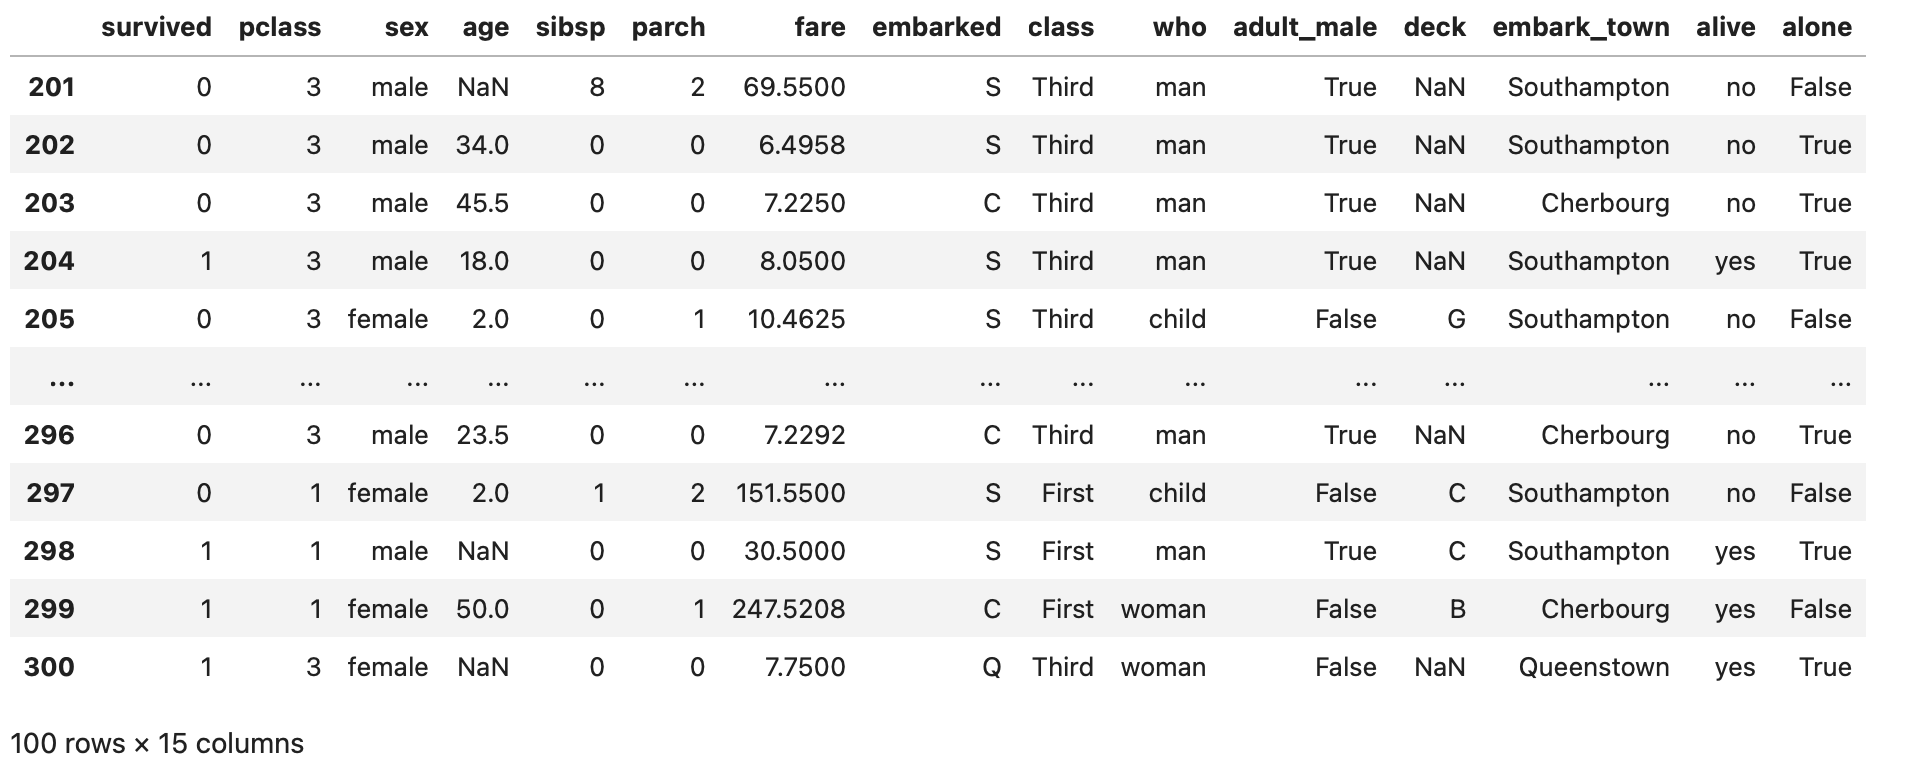

### iloc을 활용해 301~400번째 행 추출하기

In [30]:
#위의 loc과 거의 유사합니다.
#하나의 차이점은 loc의 경우 이름을 전달하는 방식이기에, 끝 인덱스도 포함이 됩니다.
#하지만 iloc의 경우에는 끝 인덱스를 포함하지 않기 때문에, 슬라이싱의 경우와 같이 끝인덱스 + 1 을 해줘야 합니다.

df2 = data.iloc[301:401,]
df2

survived  pclass     sex    age  sibsp  parch      fare embarked   class  \
301         1       3    male    NaN      2      0   23.2500        Q   Third   
302         0       3    male  19.00      0      0    0.0000        S   Third   
303         1       2  female    NaN      0      0   12.3500        Q  Second   
304         0       3    male    NaN      0      0    8.0500        S   Third   
305         1       1    male   0.92      1      2  151.5500        S   First   
..        ...     ...     ...    ...    ...    ...       ...      ...     ...   
396         0       3  female  31.00      0      0    7.8542        S   Third   
397         0       2    male  46.00      0      0   26.0000        S  Second   
398         0       2    male  23.00      0      0   10.5000        S  Second   
399         1       2  female  28.00      0      0   12.6500        S  Second   
400         1       3    male  39.00      0      0    7.9250        S   Third   

       who  adult_male deck  embark_town alive  alone  
301    man        True  NaN   Queenstown   yes  False  
302    man        True  NaN  Southampton    no   True  
303  woman       False    E   Queenstown   yes   True  
304    man        True  NaN  Southampton    no   True  
305  child       False    C  Southampton   yes  False  
..     ...         ...  ...          ...   ...    ...  
396  woman       False  NaN  Southampton    no   True  
397    man        True  NaN  Southampton    no   True  
398    man        True  NaN  Southampton    no   True  
399  woman       False  NaN  Southampton   yes   True  
400    man        True  NaN  Southampton   yes   True  

[100 rows x 15 columns]

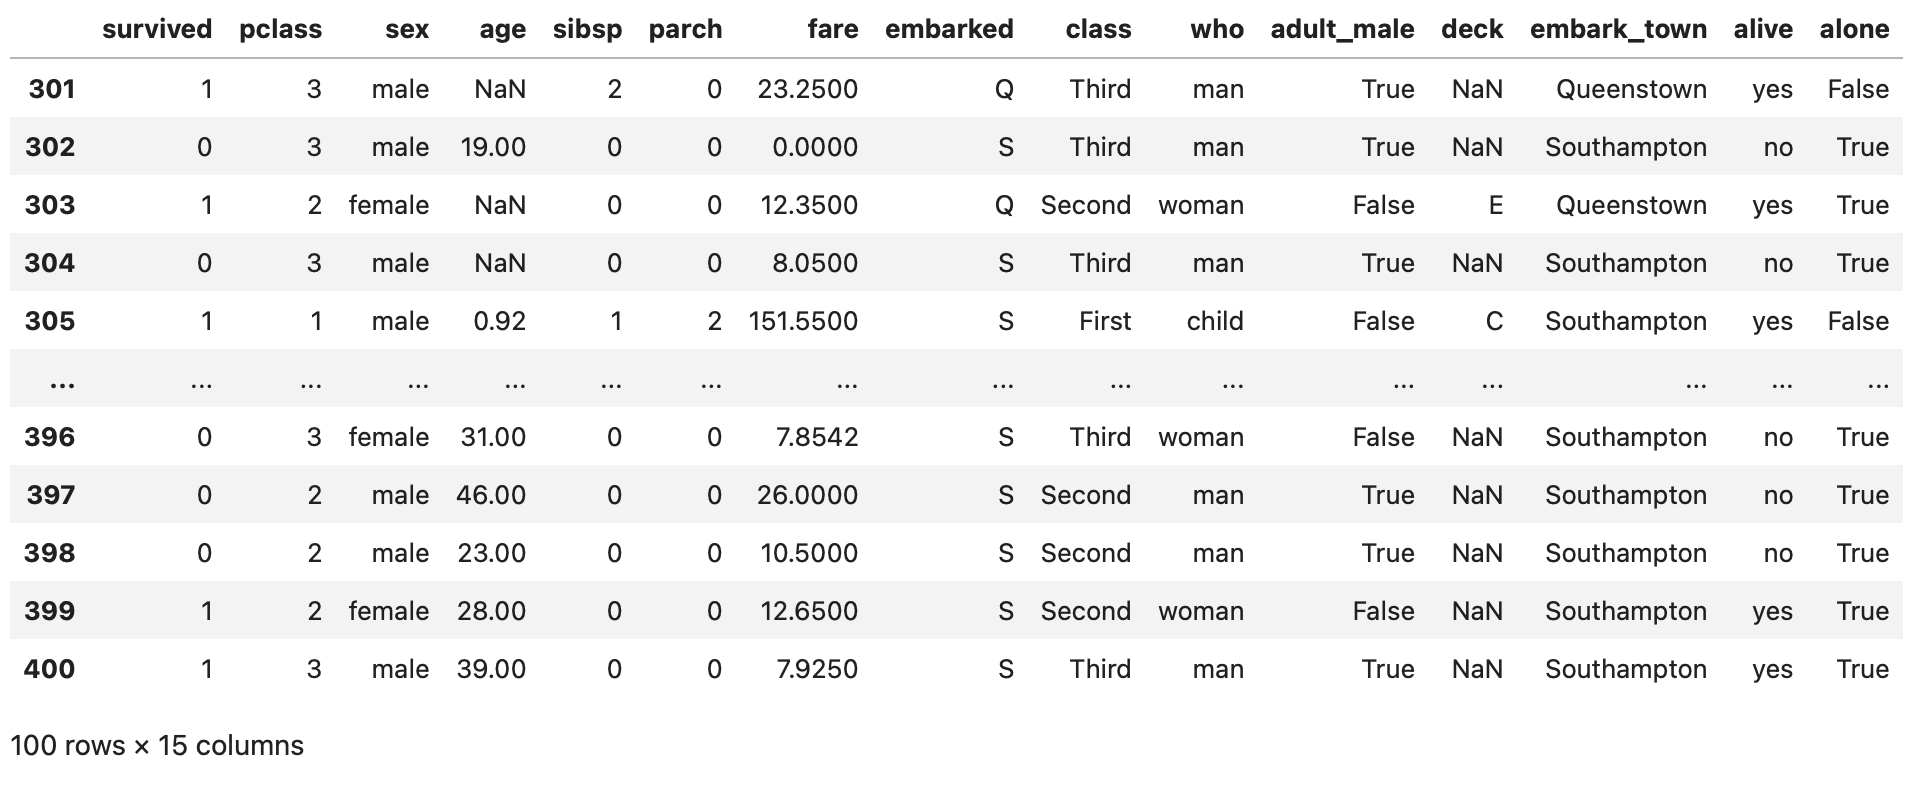

이렇게 열단위, 행 단위 추출을 각각 배웠습니다!!

## 행과 열 복합 조건 추출

이제 이걸 응용해서 주어진 조건에 따라 열과 행을 선택해 추출하는 문제를 풀어봅시다!  
데이터 명칭은 df로 통일하겠습니다

### loc을 사용하여 행은 100~120, 열은 'age', 'fare' 열을 추출해주세요

In [31]:
df = data.loc[100:120,['age','fare']]
df

age      fare
100  28.0    7.8958
101   NaN    7.8958
102  21.0   77.2875
103  33.0    8.6542
104  37.0    7.9250
105  28.0    7.8958
106  21.0    7.6500
107   NaN    7.7750
108  38.0    7.8958
109   NaN   24.1500
110  47.0   52.0000
111  14.5   14.4542
112  22.0    8.0500
113  20.0    9.8250
114  17.0   14.4583
115  21.0    7.9250
116  70.5    7.7500
117  29.0   21.0000
118  24.0  247.5208
119   2.0   31.2750
120  21.0   73.5000

1번 정답 :

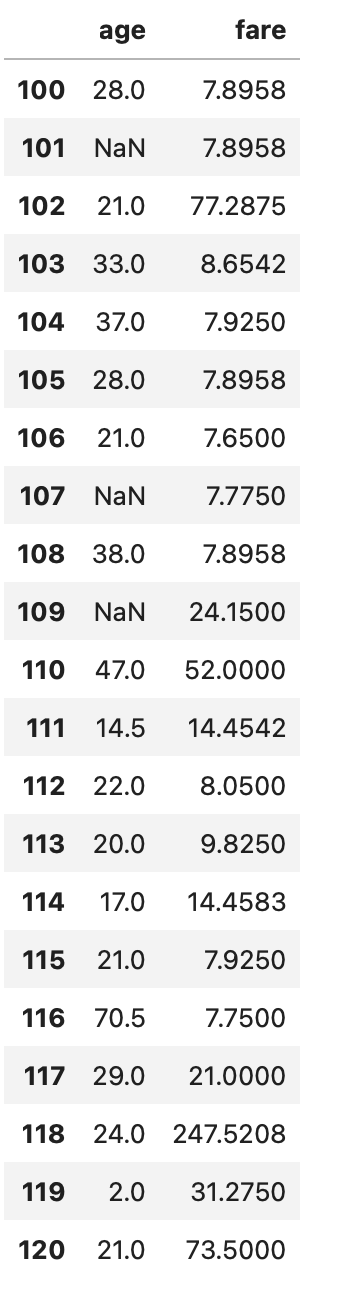

### loc을 사용하여 0, 2, 4, 7번째 행을 Fancy 인덱싱하고 열 'age'부터 'fare'까지 라벨 슬라이싱하여 추출하기

In [32]:
# Fancy 인덱싱이란 행 범위를 지정해줄 위치에 리스트 형태로 행을 전달하는 것이었죠!
# data.loc[(행 범위), (열 범위)] 중 행 범위에 리스트 정보를 전달하면 됩니다!
df = data.loc[[0,2,4,7],'age':'fare']

df

age  sibsp  parch    fare
0  22.0      1      0   7.250
2  26.0      0      0   7.925
4  35.0      0      0   8.050
7   2.0      3      1  21.075

2번 정답: 

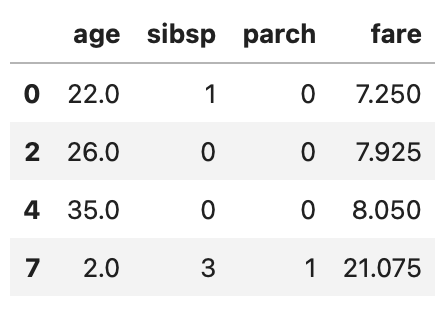

### iloc을 사용하여 10~20번째 행, 2번째 열 부터 5번째 열까지 추출해주세요

In [34]:
df = data.iloc[10:21,1:5]
df

pclass     sex   age  sibsp
10       3  female   4.0      1
11       1  female  58.0      0
12       3    male  20.0      0
13       3    male  39.0      1
14       3  female  14.0      0
15       2  female  55.0      0
16       3    male   2.0      4
17       2    male   NaN      0
18       3  female  31.0      1
19       3  female   NaN      0
20       2    male  35.0      0

3번 정답 :  
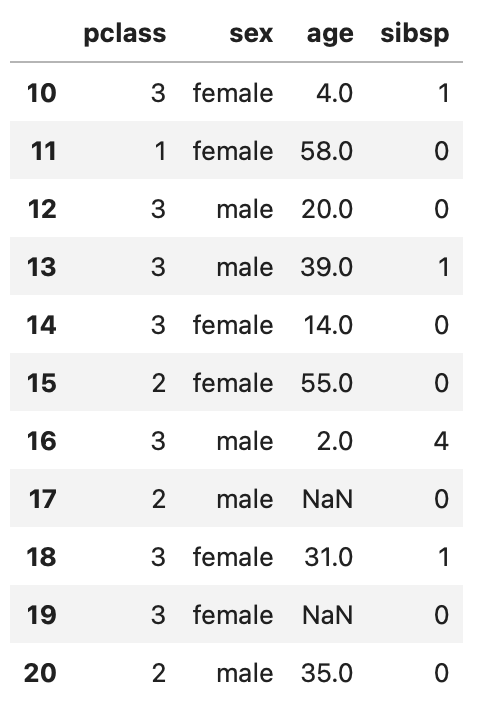

### iloc을 사용하여 행 [0, 2, 4, 6], 열 [1, 3, 5]을 추출해주세요(리스트로 전달하는 방식이나 슬라이싱 모두 사용 가능)

In [35]:
df = data.iloc[[0,2,4,6],[1,3,5]]
df

pclass   age  parch
0       3  22.0      0
2       3  26.0      0
4       3  35.0      0
6       1  54.0      0

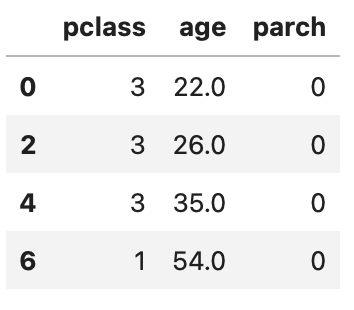

### loc을 사용해 행 라벨 200번, 열 ['survived','pclass','sex']를 추출해주세요. 단, 데이터프레임 자료형을 유지하세요

In [37]:
df = data.loc[[200],['survived','pclass','sex']]

print(df)
type(df)

     survived  pclass   sex
200         0       3  male


pandas.core.frame.DataFrame

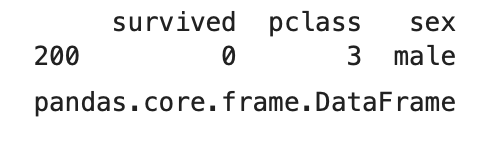

### iloc을 사용하여 행 라벨 200번의 단일 행, 그리고 0부터 3번째까지의 열을 슬라이스를 활용해 추출해주세요

In [45]:
df = data.iloc[[200],0:4]
print(df)
type(df)

     survived  pclass   sex   age
200         0       3  male  28.0


pandas.core.frame.DataFrame

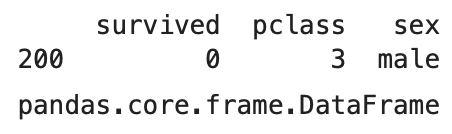

# 불리언 인덱싱
## df[조건문]

### adult_male 칼럼에서 값이 True인 행만 추출하기

In [46]:
df = data[data['adult_male']=='True']
df

Empty DataFrame
Columns: [survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone]
Index: []

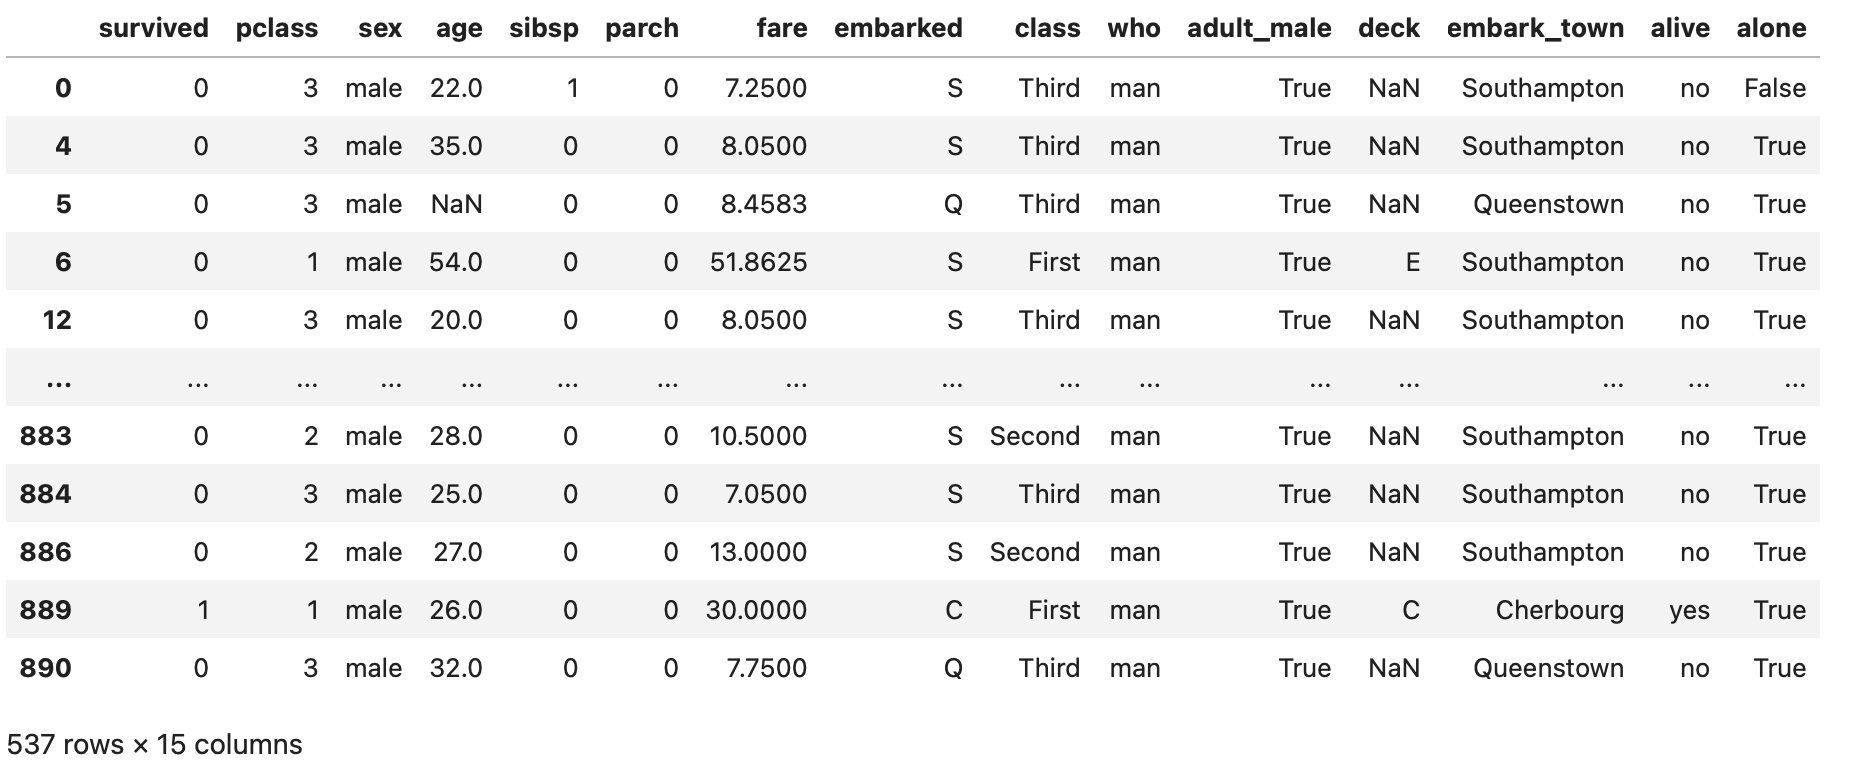

### age 열을 활용해 나이가 20세 미만인 행만 추출하기

In [48]:
df = data[data['age']<20]
df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
7           0       3    male   2.0      3      1  21.0750        S   Third   
9           1       2  female  14.0      1      0  30.0708        C  Second   
10          1       3  female   4.0      1      1  16.7000        S   Third   
14          0       3  female  14.0      0      0   7.8542        S   Third   
16          0       3    male   2.0      4      1  29.1250        Q   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
855         1       3  female  18.0      0      1   9.3500        S   Third   
869         1       3    male   4.0      1      1  11.1333        S   Third   
875         1       3  female  15.0      0      0   7.2250        C   Third   
877         0       3    male  19.0      0      0   7.8958        S   Third   
887         1       1  female  19.0      0      0  30.0000        S   First   

       who  adult_male deck  embark_town alive  alone  
7    child       False  NaN  Southampton    no  False  
9    child       False  NaN    Cherbourg   yes  False  
10   child       False    G  Southampton   yes  False  
14   child       False  NaN  Southampton    no   True  
16   child       False  NaN   Queenstown    no  False  
..     ...         ...  ...          ...   ...    ...  
855  woman       False  NaN  Southampton   yes  False  
869  child       False  NaN  Southampton   yes  False  
875  child       False  NaN    Cherbourg   yes   True  
877    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  

[164 rows x 15 columns]

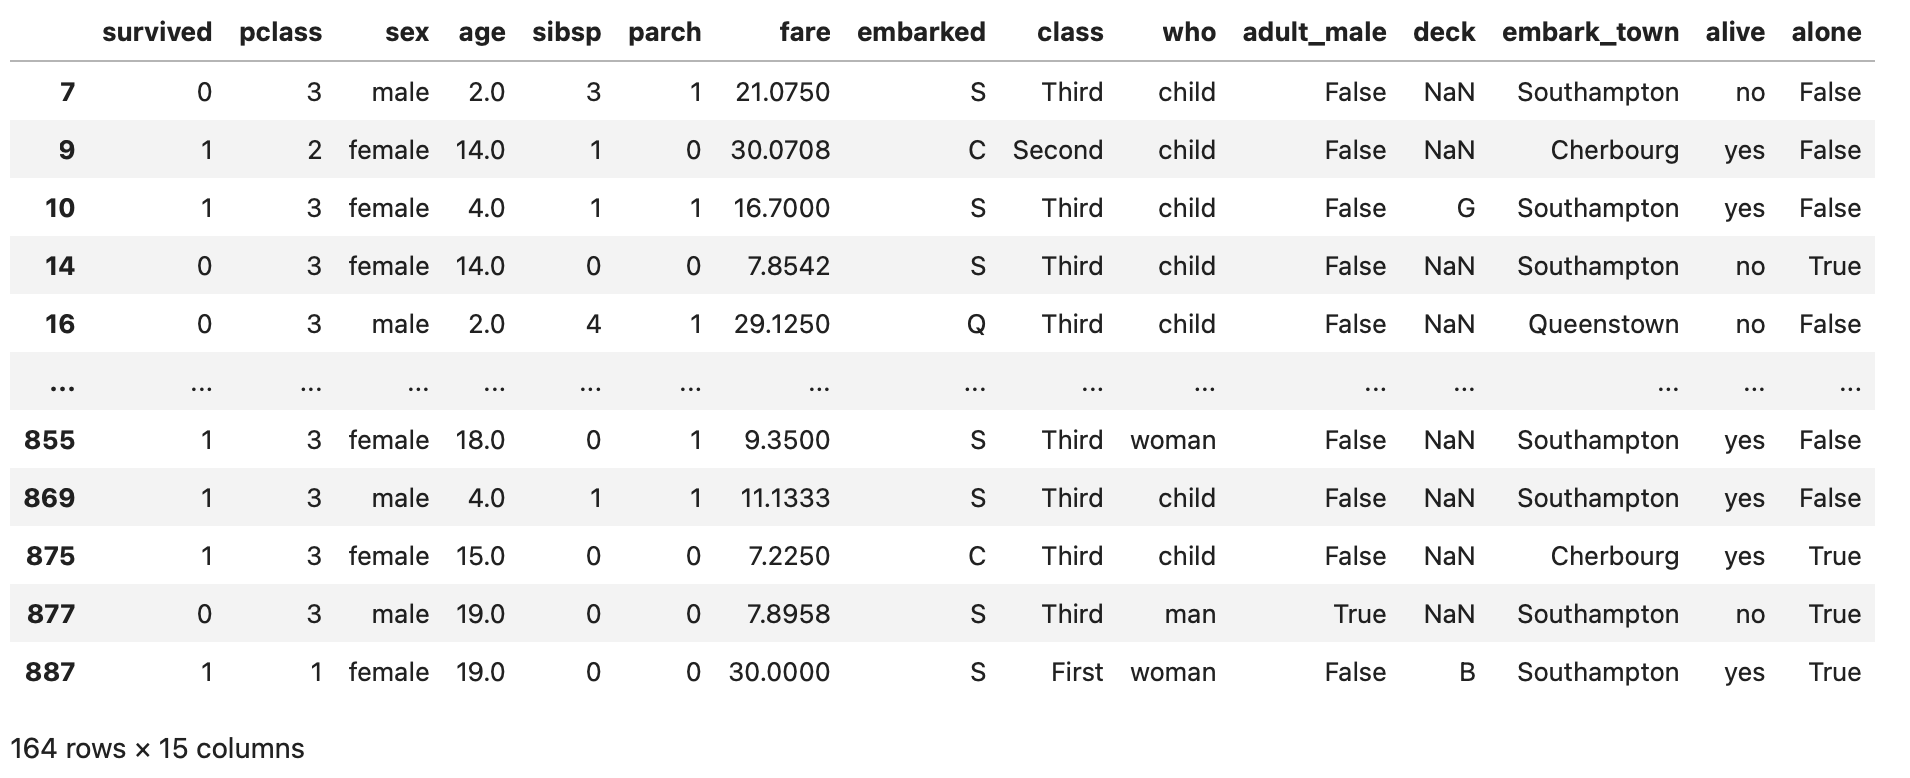

### survived 열을 통해 생존자(숫자 1) 행만 추출하기

In [49]:
df = data[data['survived']==1]
df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
8           1       3  female  27.0      0      2  11.1333        S   Third   
9           1       2  female  14.0      1      0  30.0708        C  Second   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
875         1       3  female  15.0      0      0   7.2250        C   Third   
879         1       1  female  56.0      0      1  83.1583        C   First   
880         1       2  female  25.0      0      1  26.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
889         1       1    male  26.0      0      0  30.0000        C   First   

       who  adult_male deck  embark_town alive  alone  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
8    woman       False  NaN  Southampton   yes  False  
9    child       False  NaN    Cherbourg   yes  False  
..     ...         ...  ...          ...   ...    ...  
875  child       False  NaN    Cherbourg   yes   True  
879  woman       False    C    Cherbourg   yes  False  
880  woman       False  NaN  Southampton   yes  False  
887  woman       False    B  Southampton   yes   True  
889    man        True    C    Cherbourg   yes   True  

[342 rows x 15 columns]

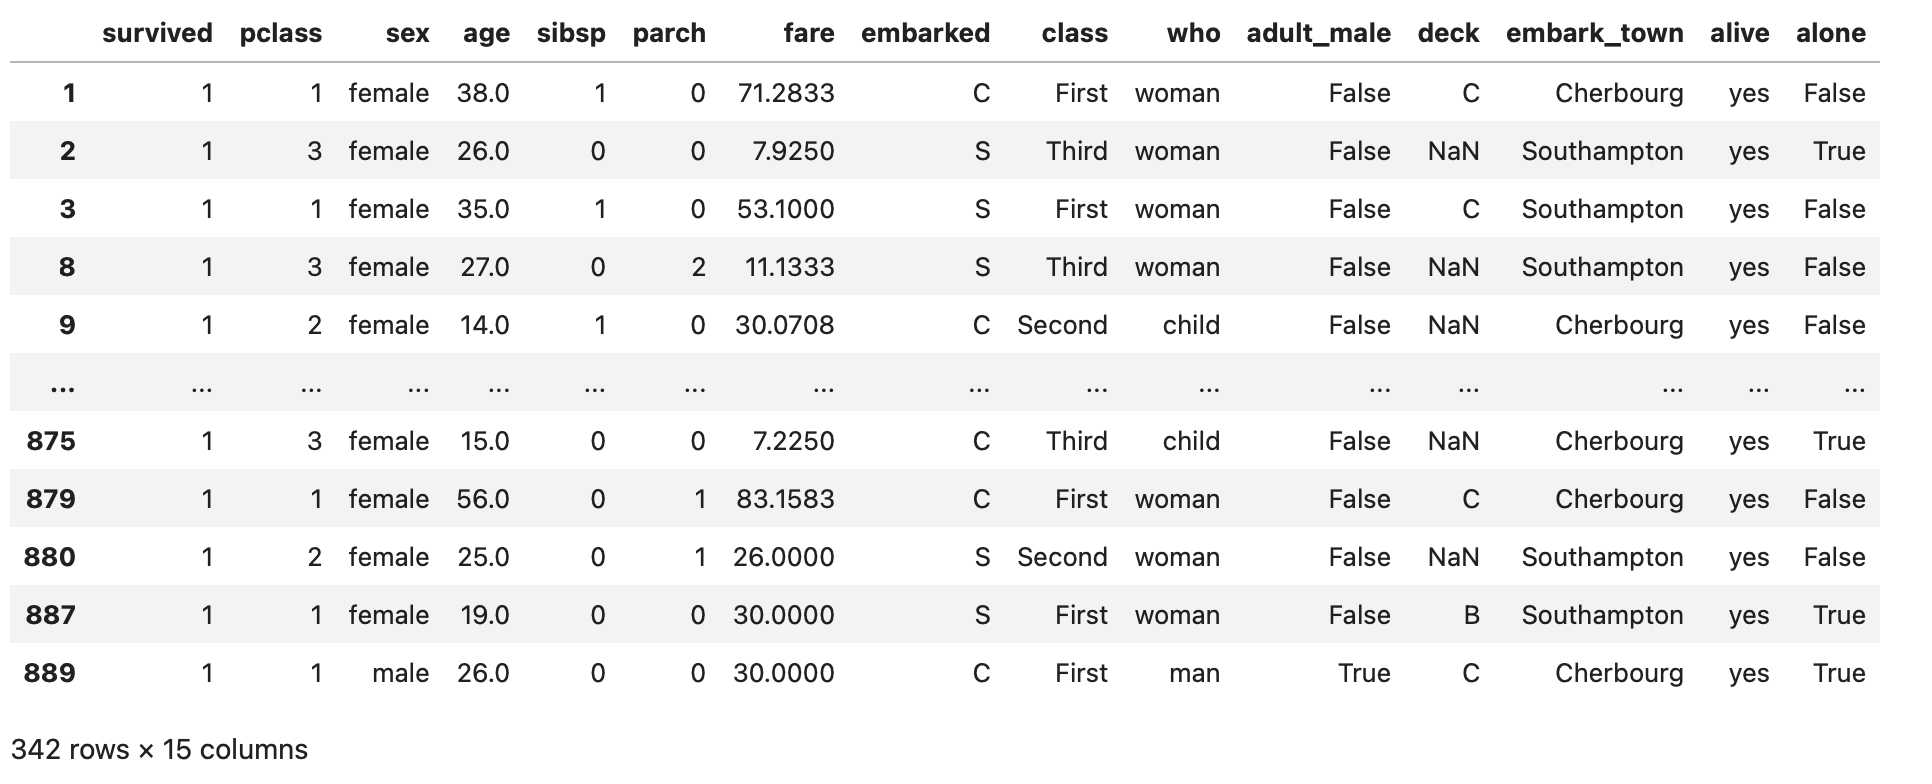

### 참고) loc에서 불리언 인덱싱 사용하기

loc을 사용해 'survived'열의 값이 1인 데이터를 추출하세요! (데이터프레임.loc[조건문, 열 이름] 형태 사용)

In [50]:
df = data.loc[data['survived']==1,'survived']
df

1      1
2      1
3      1
8      1
9      1
      ..
875    1
879    1
880    1
887    1
889    1
Name: survived, Length: 342, dtype: int64

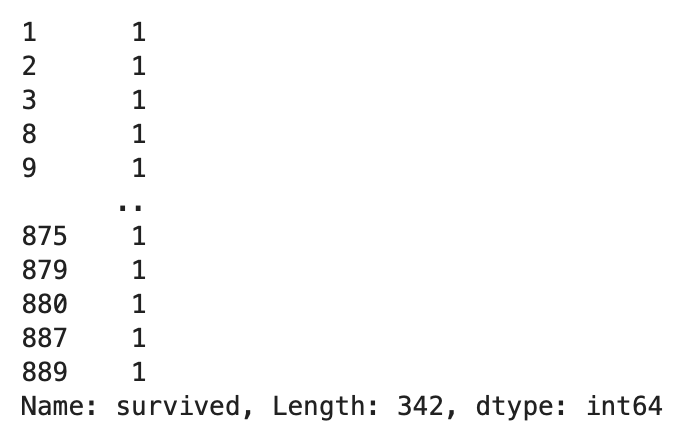

## df[(조건문 1) 논리연산자 (조건문 2)]
### 나이가 20세 이상이면서 성별이 여성인 탑승자 행을 추출하세요

In [51]:
#불리언인덱싱에서 조건문을 이어주는 논리 연산자는 문자가 아닌 기호로 사용해야합니다.
#and가 필요하다면 &, or이 필요하다면 |(엔터 위 역슬래시, 혹은 원화 기호를 시프트 누르고 입력)를 입력하세요
df = data[(data['age']>=20)&(data['sex']=='female')]
df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
8           1       3  female  27.0      0      2  11.1333        S   Third   
11          1       1  female  58.0      0      0  26.5500        S   First   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
874         1       2  female  28.0      1      0  24.0000        C  Second   
879         1       1  female  56.0      0      1  83.1583        C   First   
880         1       2  female  25.0      0      1  26.0000        S  Second   
882         0       3  female  22.0      0      0  10.5167        S   Third   
885         0       3  female  39.0      0      5  29.1250        Q   Third   

       who  adult_male deck  embark_town alive  alone  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
8    woman       False  NaN  Southampton   yes  False  
11   woman       False    C  Southampton   yes   True  
..     ...         ...  ...          ...   ...    ...  
874  woman       False  NaN    Cherbourg   yes  False  
879  woman       False    C    Cherbourg   yes  False  
880  woman       False  NaN  Southampton   yes  False  
882  woman       False  NaN  Southampton    no   True  
885  woman       False  NaN   Queenstown    no  False  

[186 rows x 15 columns]

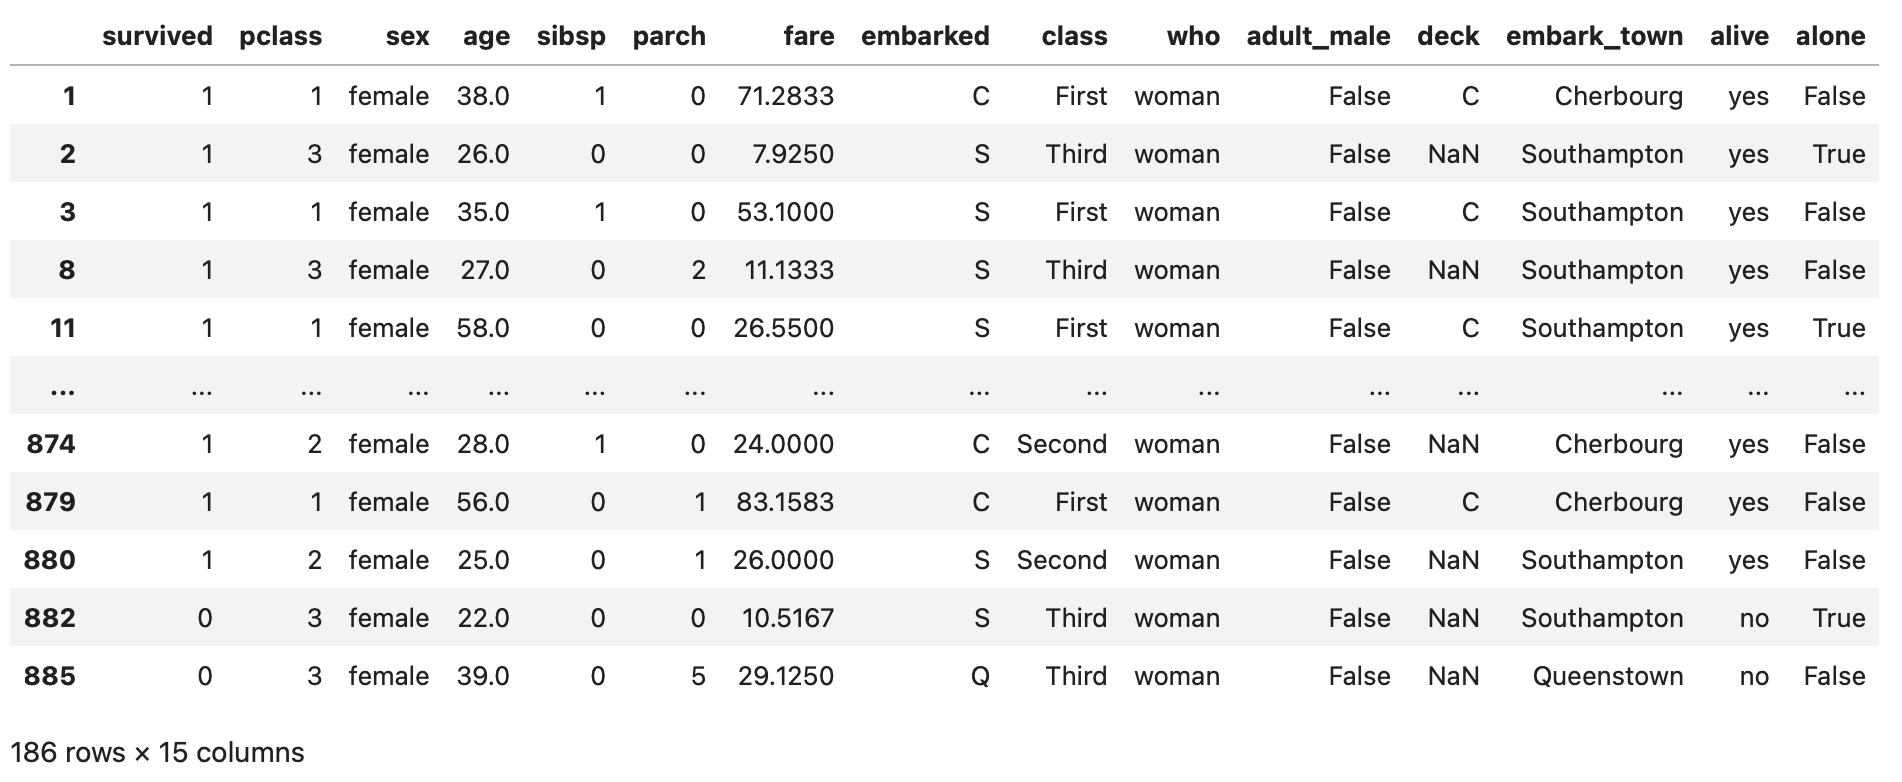

### sibsp의 값이 0이 아니거나, 또는 parch의 값이 0이 아닌 행을 추출하세요 (or 사용)

In [52]:
# a와 b가 같지 않다는 파이선에서 a != b 의 형태로 사용합니다!
df = data[(data['sibsp']!=0)|(data['parch']!=0)]
df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
3           1       1  female  35.0      1      0  53.1000        S   First   
7           0       3    male   2.0      3      1  21.0750        S   Third   
8           1       3  female  27.0      0      2  11.1333        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
874         1       2  female  28.0      1      0  24.0000        C  Second   
879         1       1  female  56.0      0      1  83.1583        C   First   
880         1       2  female  25.0      0      1  26.0000        S  Second   
885         0       3  female  39.0      0      5  29.1250        Q   Third   
888         0       3  female   NaN      1      2  23.4500        S   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
3    woman       False    C  Southampton   yes  False  
7    child       False  NaN  Southampton    no  False  
8    woman       False  NaN  Southampton   yes  False  
..     ...         ...  ...          ...   ...    ...  
874  woman       False  NaN    Cherbourg   yes  False  
879  woman       False    C    Cherbourg   yes  False  
880  woman       False  NaN  Southampton   yes  False  
885  woman       False  NaN   Queenstown    no  False  
888  woman       False  NaN  Southampton    no  False  

[354 rows x 15 columns]

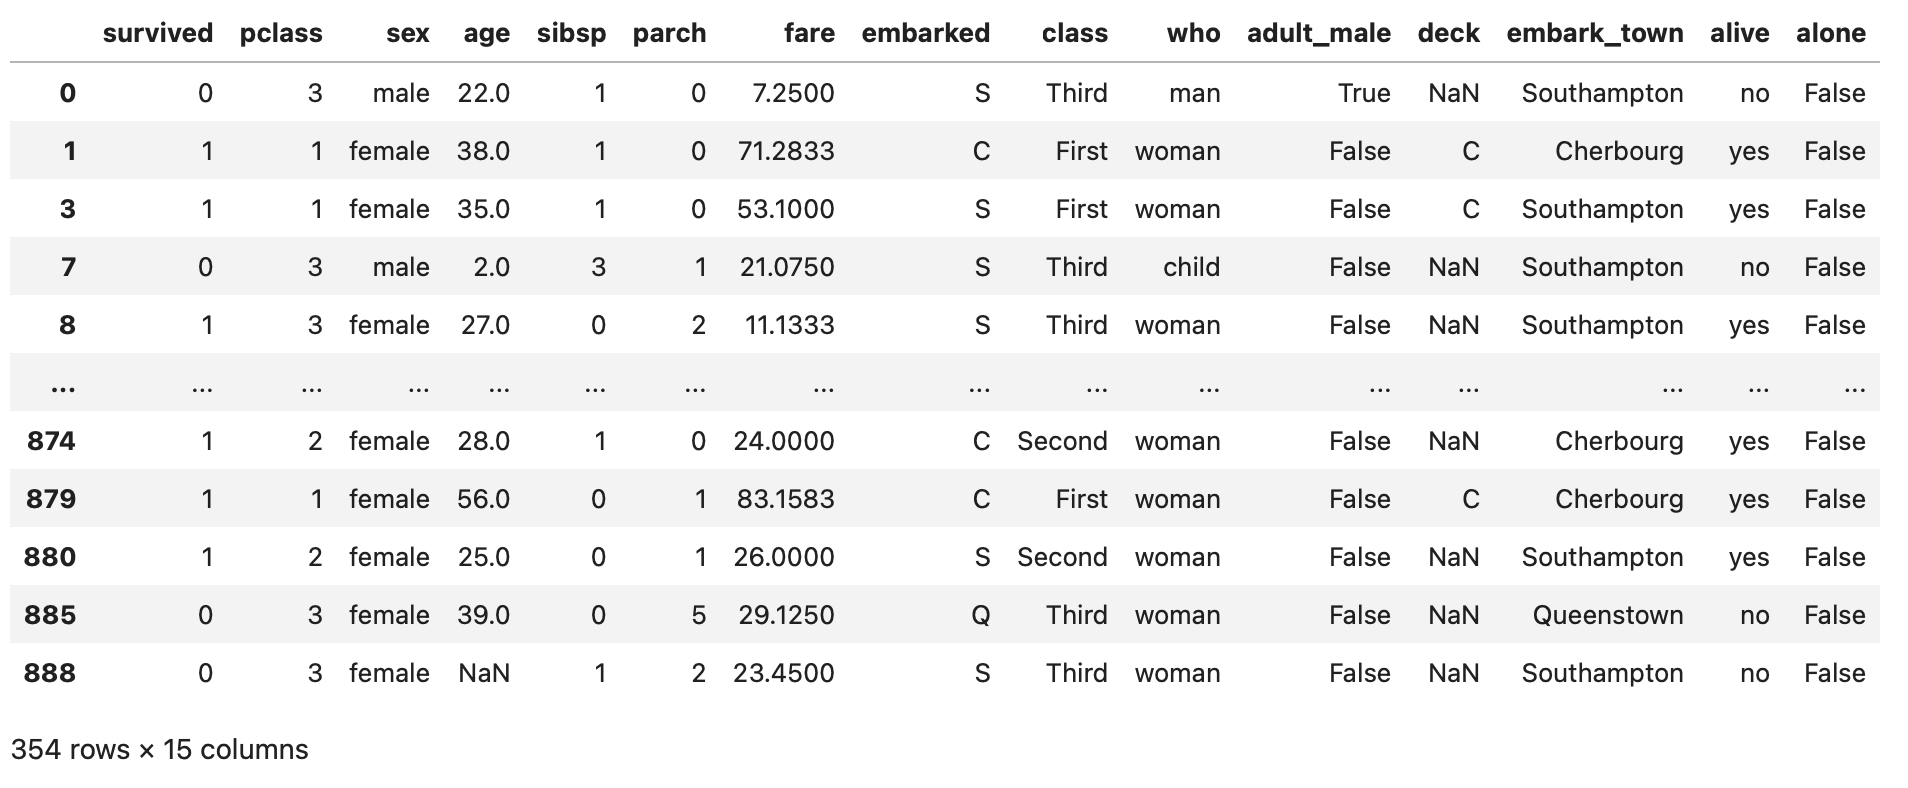

### sibsp의 값이 0이면서, parch의 값도 0인 행을 추출하세요 (and 사용)

In [53]:
df = data[(data['sibsp']==0)&(data['parch']==0)]
df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
2           1       3  female  26.0      0      0   7.9250        S   Third   
4           0       3    male  35.0      0      0   8.0500        S   Third   
5           0       3    male   NaN      0      0   8.4583        Q   Third   
6           0       1    male  54.0      0      0  51.8625        S   First   
11          1       1  female  58.0      0      0  26.5500        S   First   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
884         0       3    male  25.0      0      0   7.0500        S   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
2    woman       False  NaN  Southampton   yes   True  
4      man        True  NaN  Southampton    no   True  
5      man        True  NaN   Queenstown    no   True  
6      man        True    E  Southampton    no   True  
11   woman       False    C  Southampton   yes   True  
..     ...         ...  ...          ...   ...    ...  
884    man        True  NaN  Southampton    no   True  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[537 rows x 15 columns]

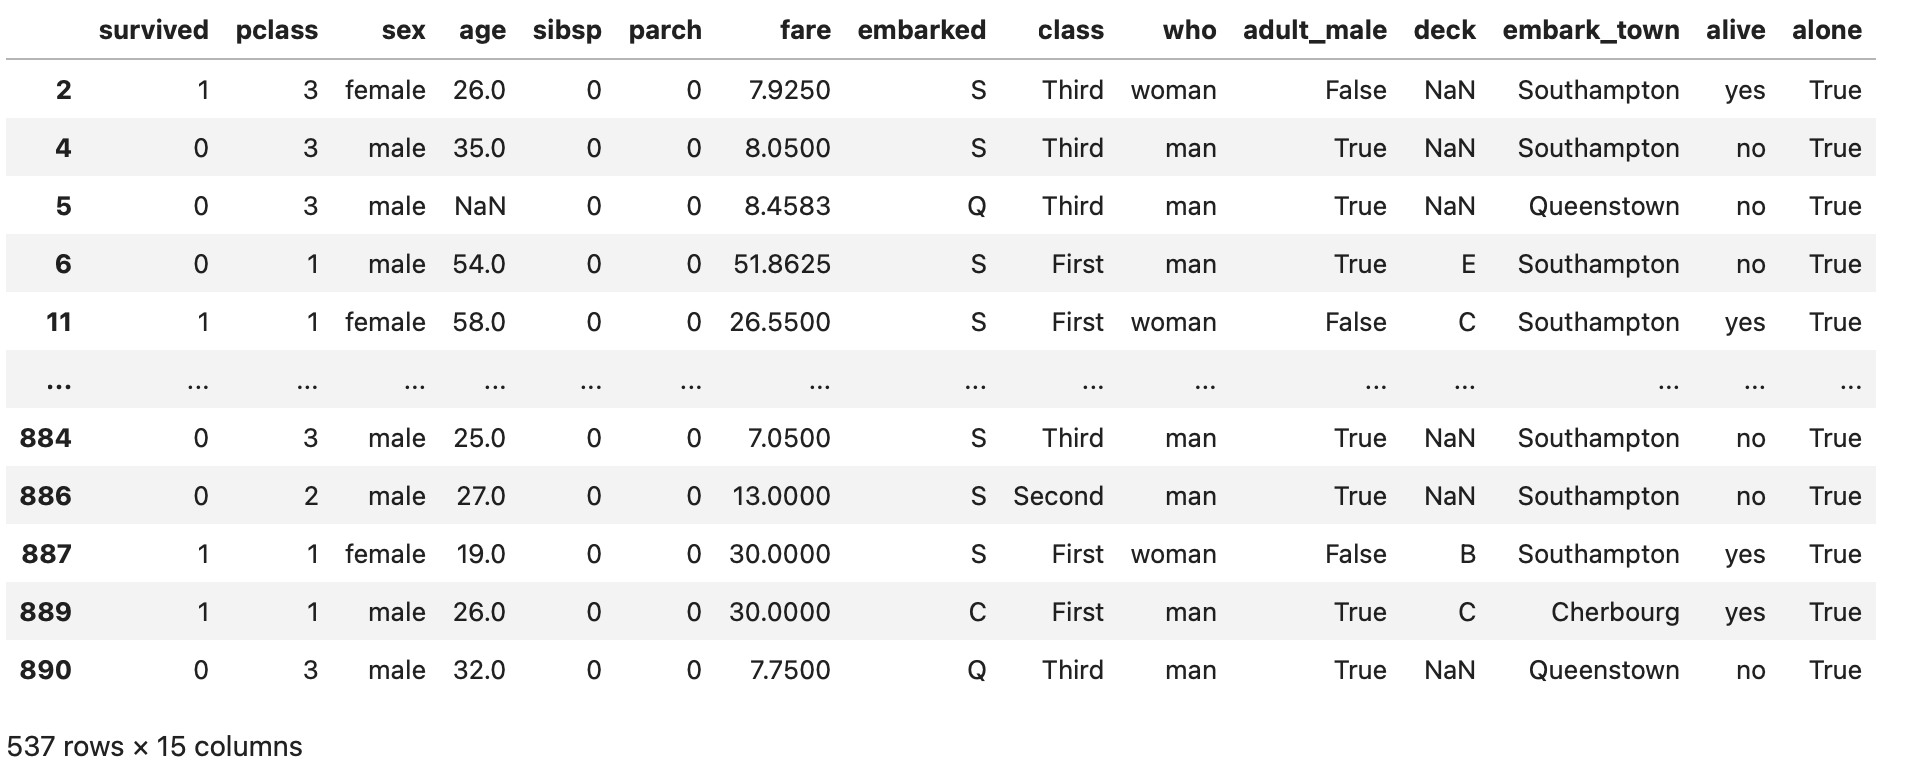

### 생존자이면서, 성별은 남성, 나이는 20세 이상인 행을 추출하세요

In [54]:
df = data[(data['survived']==1)&(data['age']>=20)&(data['sex']=='male')]
df

survived  pclass   sex   age  sibsp  parch     fare embarked   class  \
21          1       2  male  34.0      0      0  13.0000        S  Second   
23          1       1  male  28.0      0      0  35.5000        S   First   
74          1       3  male  32.0      0      0  56.4958        S   Third   
81          1       3  male  29.0      0      0   9.5000        S   Third   
97          1       1  male  23.0      0      1  63.3583        C   First   
..        ...     ...   ...   ...    ...    ...      ...      ...     ...   
804         1       3  male  27.0      0      0   6.9750        S   Third   
821         1       3  male  27.0      0      0   8.6625        S   Third   
838         1       3  male  32.0      0      0  56.4958        S   Third   
857         1       1  male  51.0      0      0  26.5500        S   First   
889         1       1  male  26.0      0      0  30.0000        C   First   

     who  adult_male deck  embark_town alive  alone  
21   man        True    D  Southampton   yes   True  
23   man        True    A  Southampton   yes   True  
74   man        True  NaN  Southampton   yes   True  
81   man        True  NaN  Southampton   yes   True  
97   man        True    D    Cherbourg   yes  False  
..   ...         ...  ...          ...   ...    ...  
804  man        True  NaN  Southampton   yes   True  
821  man        True  NaN  Southampton   yes   True  
838  man        True  NaN  Southampton   yes   True  
857  man        True    E  Southampton   yes   True  
889  man        True    C    Cherbourg   yes   True  

[67 rows x 15 columns]

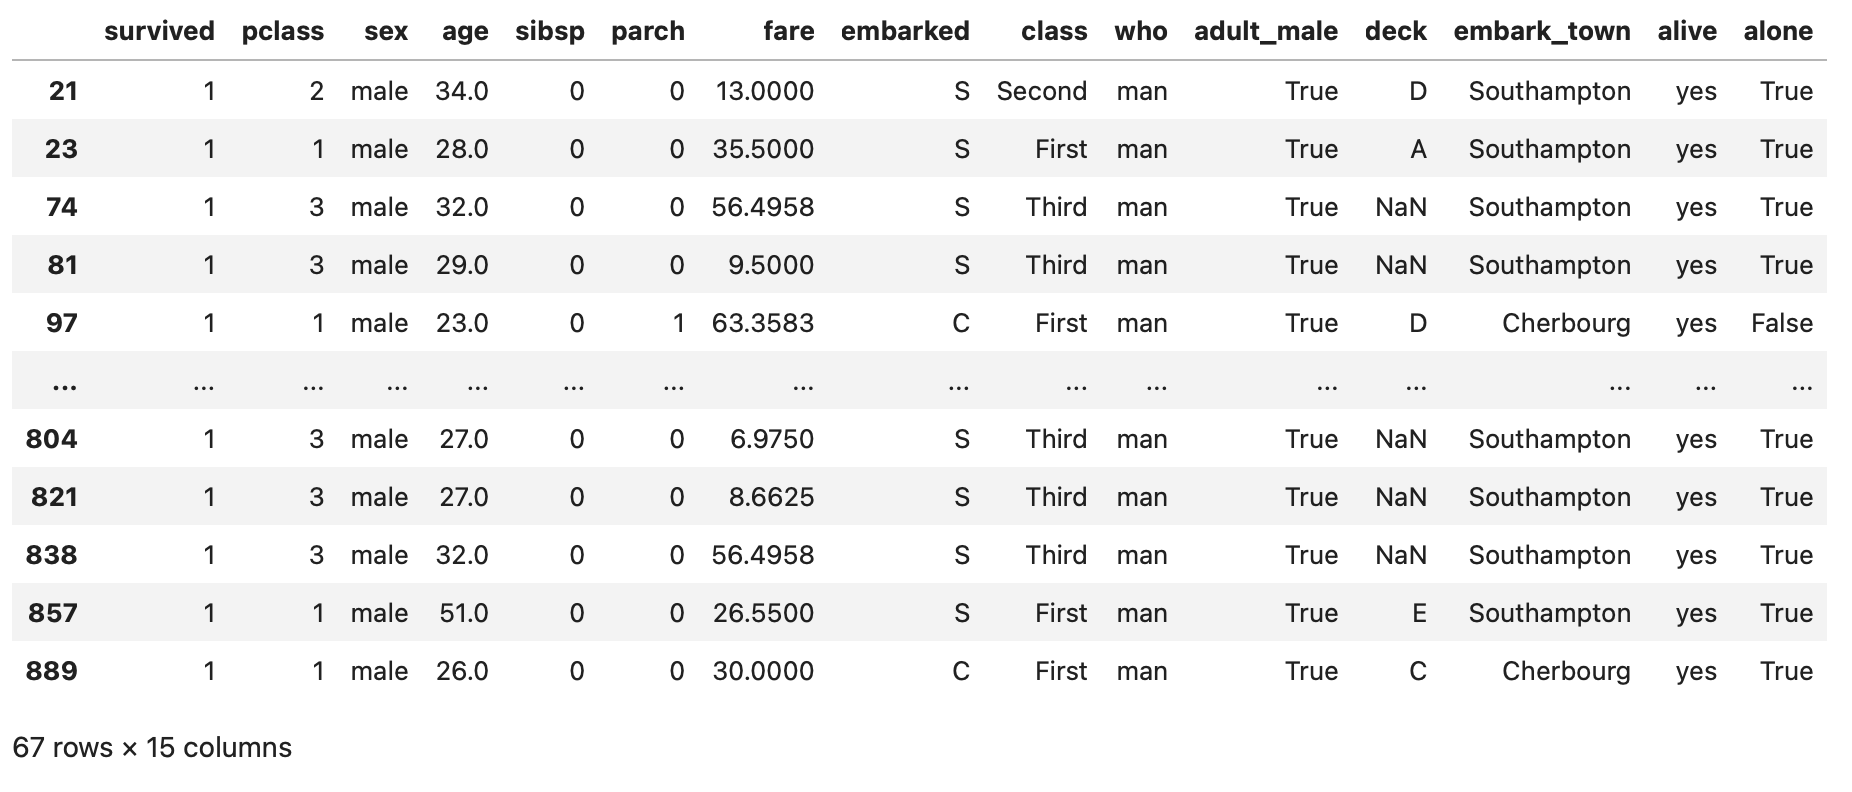

### 생존자이면서, 나이는 5세 미만이거나 70세 이상, 1등석 또는 2등석 탑승자인 행을 추출하세요.
- 단, 좌석 등급은 pclass 칼럼 기준이며, 3등석이 아닌 행을 구하지 말고, 1등석 or 2등석으로 구해주세요(결측치가 있을 수 있으니까요)
- 문제의 쉼표 단위로 괄호로 묶어서 작성해주세요. 아래 예시처럼요!

df = data[(생존자 조건)
          & (숭객 나이 조건 (or 구문)) 
          & (좌석 등급 조건 (or 구문))]


(& 대신 *을 사용해도 됩니다!)

In [59]:
df = data[(data['survived']==1)&((data['age']<5)|(data['age']>=70))&((data['pclass']==1)|(data['pclass']==2))]
df

survived  pclass     sex    age  sibsp  parch      fare embarked   class  \
43          1       2  female   3.00      1      2   41.5792        C  Second   
78          1       2    male   0.83      0      2   29.0000        S  Second   
183         1       2    male   1.00      2      1   39.0000        S  Second   
193         1       2    male   3.00      1      1   26.0000        S  Second   
305         1       1    male   0.92      1      2  151.5500        S   First   
340         1       2    male   2.00      1      1   26.0000        S  Second   
407         1       2    male   3.00      1      1   18.7500        S  Second   
445         1       1    male   4.00      0      2   81.8583        S   First   
530         1       2  female   2.00      1      1   26.0000        S  Second   
618         1       2  female   4.00      2      1   39.0000        S  Second   
630         1       1    male  80.00      0      0   30.0000        S   First   
750         1       2  female   4.00      1      1   23.0000        S  Second   
755         1       2    male   0.67      1      1   14.5000        S  Second   
827         1       2    male   1.00      0      2   37.0042        C  Second   
831         1       2    male   0.83      1      1   18.7500        S  Second   

       who  adult_male deck  embark_town alive  alone  
43   child       False  NaN    Cherbourg   yes  False  
78   child       False  NaN  Southampton   yes  False  
183  child       False    F  Southampton   yes  False  
193  child       False    F  Southampton   yes  False  
305  child       False    C  Southampton   yes  False  
340  child       False    F  Southampton   yes  False  
407  child       False  NaN  Southampton   yes  False  
445  child       False    A  Southampton   yes  False  
530  child       False  NaN  Southampton   yes  False  
618  child       False    F  Southampton   yes  False  
630    man        True    A  Southampton   yes   True  
750  child       False  NaN  Southampton   yes  False  
755  child       False  NaN  Southampton   yes  False  
827  child       False  NaN    Cherbourg   yes  False  
831  child       False  NaN  Southampton   yes  False

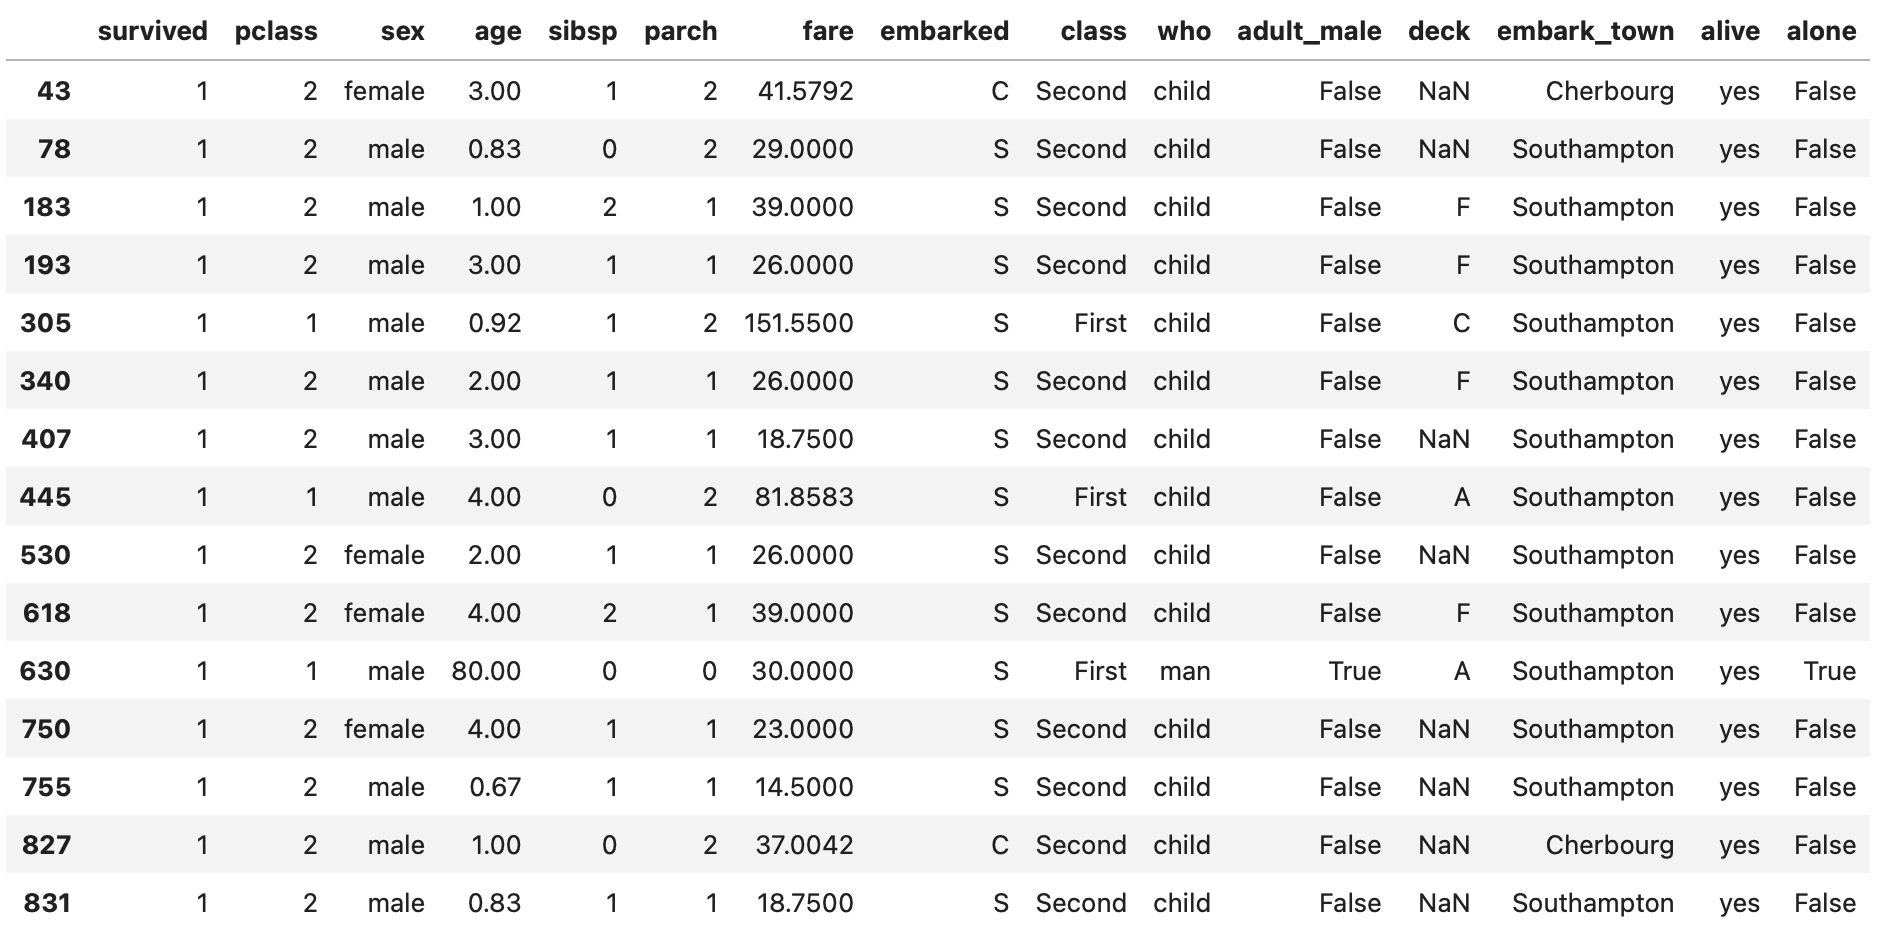

# 인덱스 설정

### set_index를 사용해 age 열을 인덱스로 사용해봅시다. df1에 대해 inpace=True 옵션을 사용해주세요!

In [60]:
df1 = data[:] #원본 데이터프레임을 유지하기 위해 새로운 데이터프레임에 내용을 복사하는 구문입니다. 
df1.set_index('age', inplace=True)
df1

survived  pclass     sex  sibsp  parch     fare embarked   class    who  \
age                                                                             
22.0         0       3    male      1      0   7.2500        S   Third    man   
38.0         1       1  female      1      0  71.2833        C   First  woman   
26.0         1       3  female      0      0   7.9250        S   Third  woman   
35.0         1       1  female      1      0  53.1000        S   First  woman   
35.0         0       3    male      0      0   8.0500        S   Third    man   
...        ...     ...     ...    ...    ...      ...      ...     ...    ...   
27.0         0       2    male      0      0  13.0000        S  Second    man   
19.0         1       1  female      0      0  30.0000        S   First  woman   
NaN          0       3  female      1      2  23.4500        S   Third  woman   
26.0         1       1    male      0      0  30.0000        C   First    man   
32.0         0       3    male      0      0   7.7500        Q   Third    man   

      adult_male deck  embark_town alive  alone  
age                                              
22.0        True  NaN  Southampton    no  False  
38.0       False    C    Cherbourg   yes  False  
26.0       False  NaN  Southampton   yes   True  
35.0       False    C  Southampton   yes  False  
35.0        True  NaN  Southampton    no   True  
...          ...  ...          ...   ...    ...  
27.0        True  NaN  Southampton    no   True  
19.0       False    B  Southampton   yes   True  
NaN        False  NaN  Southampton    no  False  
26.0        True    C    Cherbourg   yes   True  
32.0        True  NaN   Queenstown    no   True  

[891 rows x 14 columns]

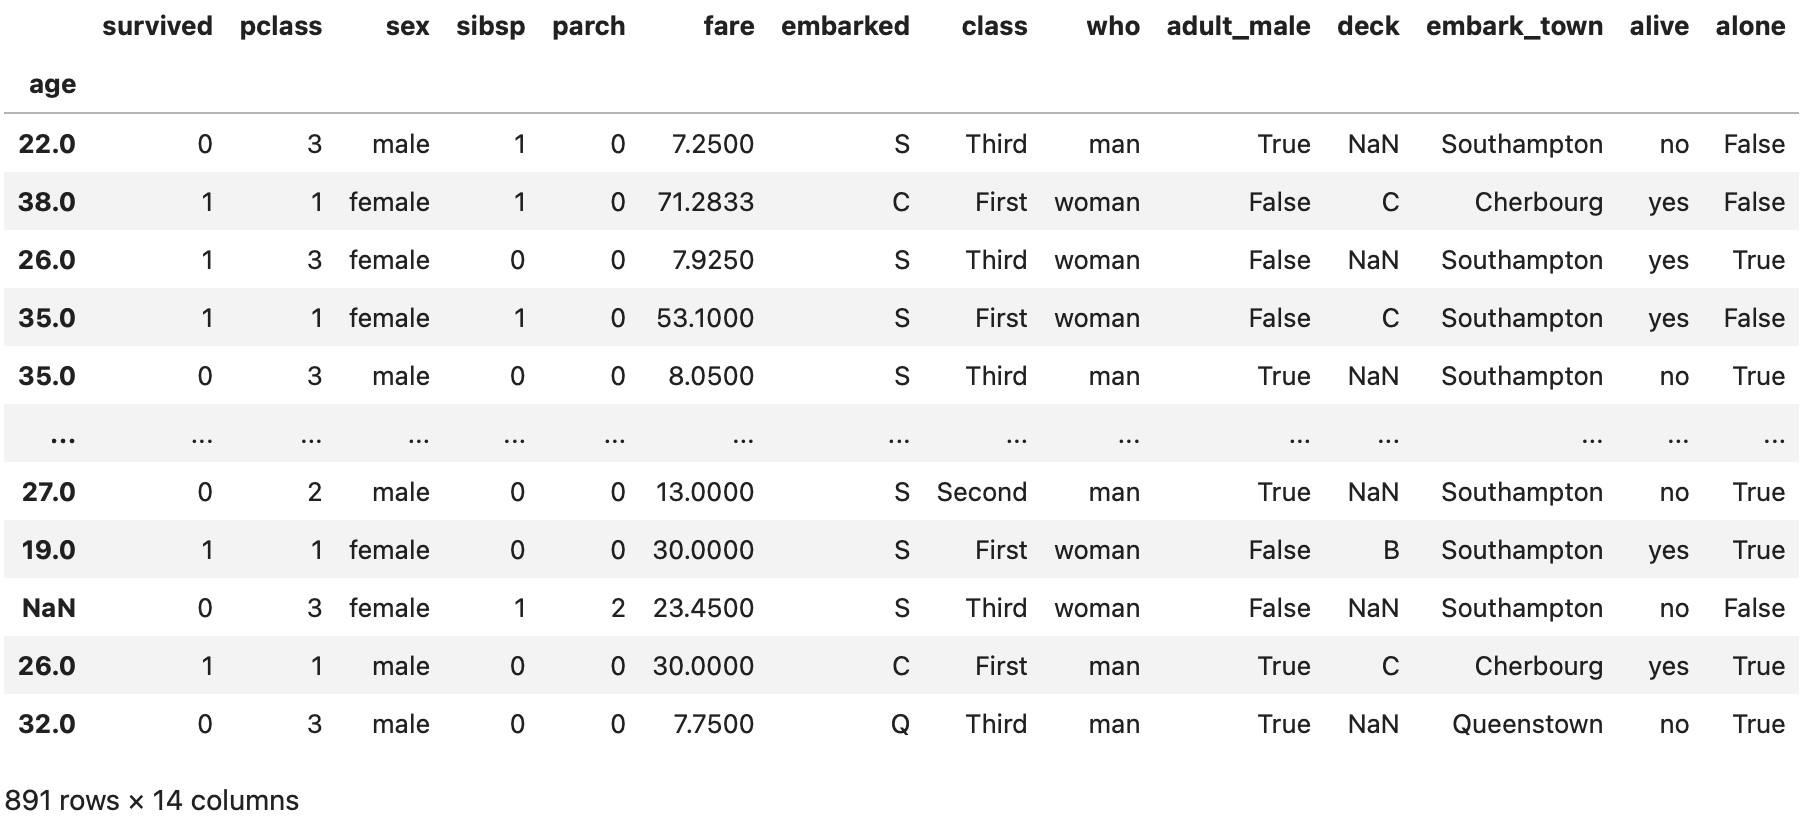

### sort_index를 사용해서 나이 인덱스 기준으로 정렬하기


In [61]:
df1.sort_index()

survived  pclass     sex  sibsp  parch     fare embarked   class    who  \
age                                                                             
0.42         1       3    male      0      1   8.5167        C   Third  child   
0.67         1       2    male      1      1  14.5000        S  Second  child   
0.75         1       3  female      2      1  19.2583        C   Third  child   
0.75         1       3  female      2      1  19.2583        C   Third  child   
0.83         1       2    male      0      2  29.0000        S  Second  child   
...        ...     ...     ...    ...    ...      ...      ...     ...    ...   
NaN          0       3    male      0      0   7.2292        C   Third    man   
NaN          0       3  female      8      2  69.5500        S   Third  woman   
NaN          0       3    male      0      0   9.5000        S   Third    man   
NaN          0       3    male      0      0   7.8958        S   Third    man   
NaN          0       3  female      1      2  23.4500        S   Third  woman   

      adult_male deck  embark_town alive  alone  
age                                              
0.42       False  NaN    Cherbourg   yes  False  
0.67       False  NaN  Southampton   yes  False  
0.75       False  NaN    Cherbourg   yes  False  
0.75       False  NaN    Cherbourg   yes  False  
0.83       False  NaN  Southampton   yes  False  
...          ...  ...          ...   ...    ...  
NaN         True  NaN    Cherbourg    no   True  
NaN        False  NaN  Southampton    no  False  
NaN         True  NaN  Southampton    no   True  
NaN         True  NaN  Southampton    no   True  
NaN        False  NaN  Southampton    no  False  

[891 rows x 14 columns]

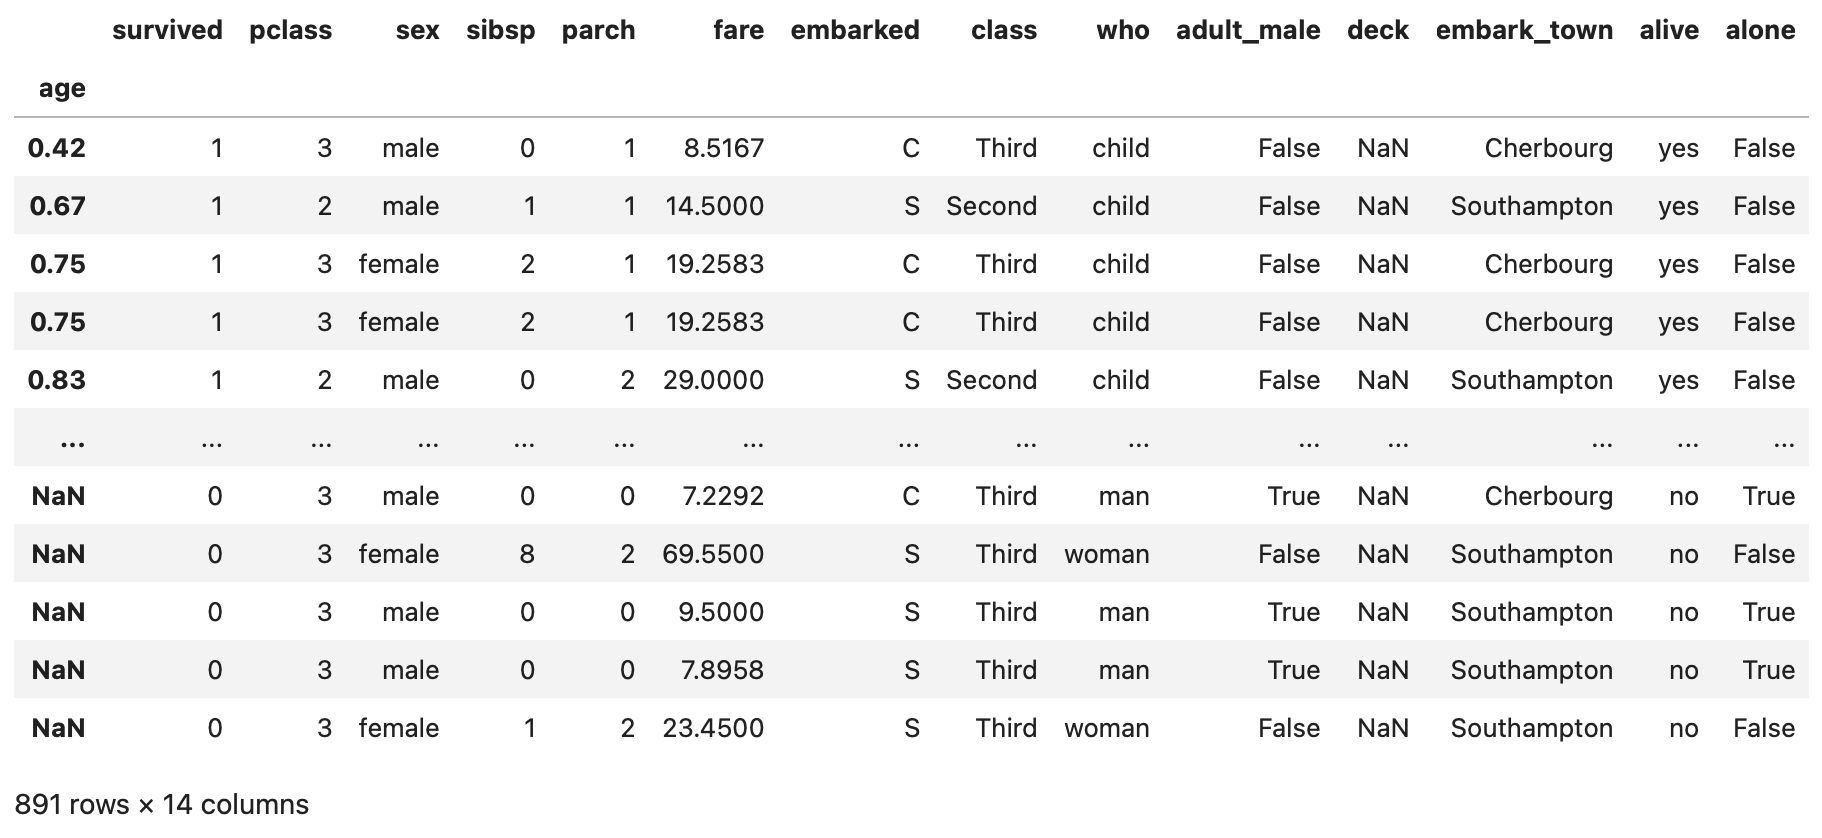

### reset_index를 활용해 인덱스를 리셋합니다, drop=False 옵션 사용해주세요

In [62]:
df1.reset_index(inplace=True, drop=False)
df1

age  survived  pclass     sex  sibsp  parch     fare embarked   class  \
0    22.0         0       3    male      1      0   7.2500        S   Third   
1    38.0         1       1  female      1      0  71.2833        C   First   
2    26.0         1       3  female      0      0   7.9250        S   Third   
3    35.0         1       1  female      1      0  53.1000        S   First   
4    35.0         0       3    male      0      0   8.0500        S   Third   
..    ...       ...     ...     ...    ...    ...      ...      ...     ...   
886  27.0         0       2    male      0      0  13.0000        S  Second   
887  19.0         1       1  female      0      0  30.0000        S   First   
888   NaN         0       3  female      1      2  23.4500        S   Third   
889  26.0         1       1    male      0      0  30.0000        C   First   
890  32.0         0       3    male      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

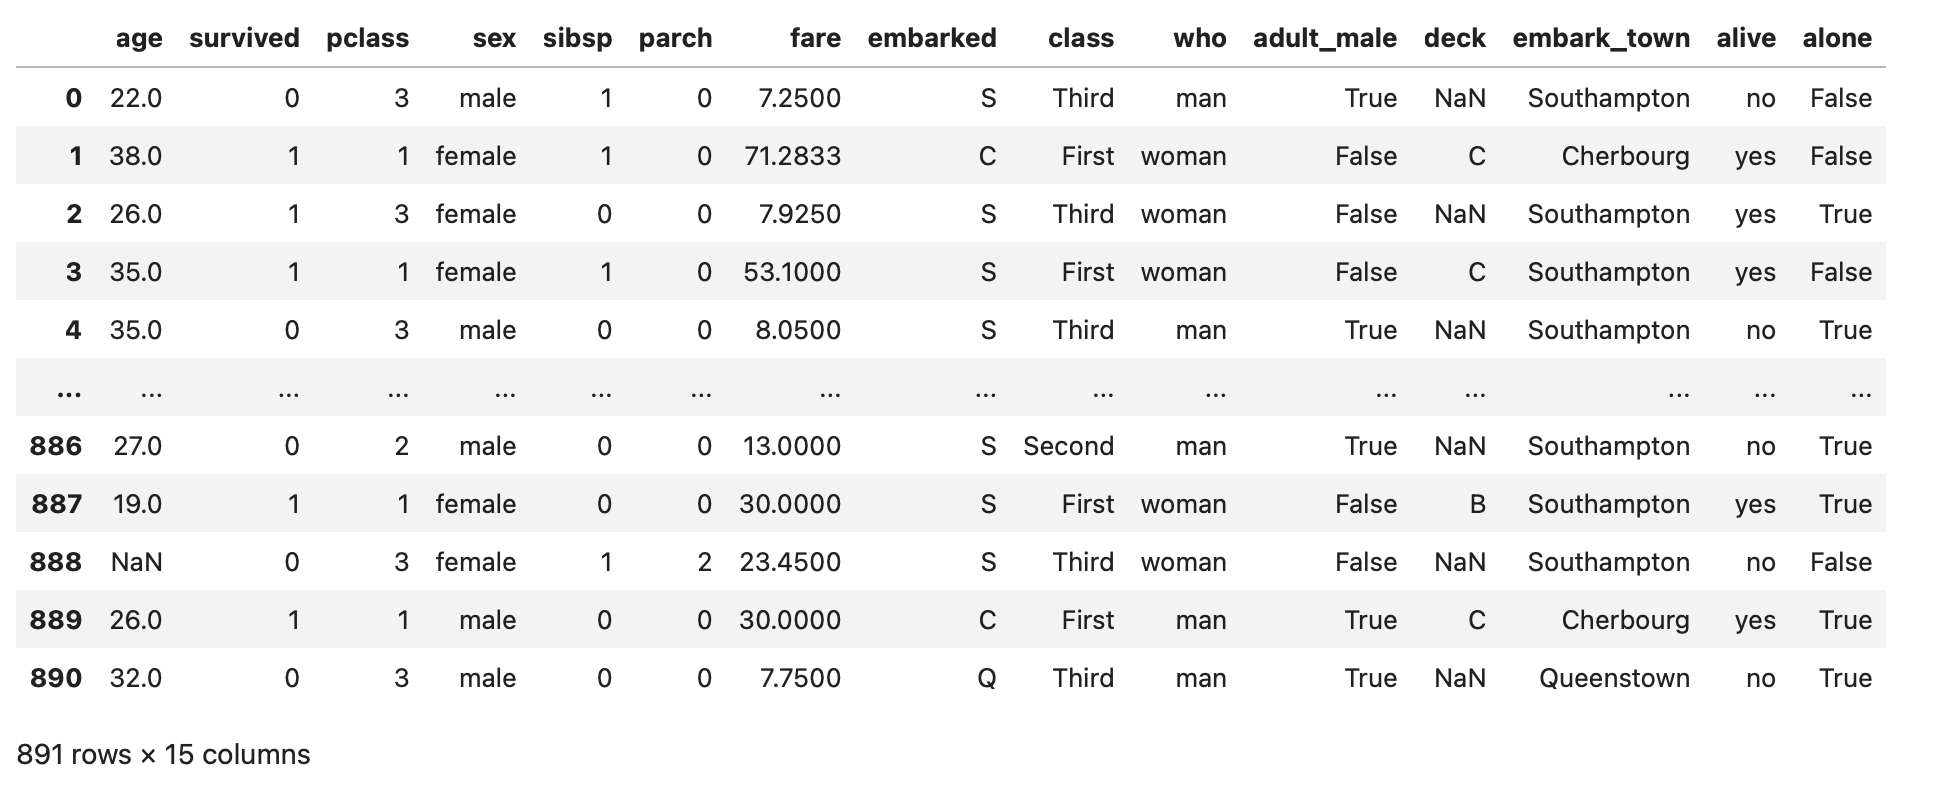

### 나이를 기준으로 다시 정렬을 해봅시다

In [63]:
df1.sort_values(by ='age')

age  survived  pclass     sex  sibsp  parch     fare embarked   class  \
803  0.42         1       3    male      0      1   8.5167        C   Third   
755  0.67         1       2    male      1      1  14.5000        S  Second   
469  0.75         1       3  female      2      1  19.2583        C   Third   
644  0.75         1       3  female      2      1  19.2583        C   Third   
78   0.83         1       2    male      0      2  29.0000        S  Second   
..    ...       ...     ...     ...    ...    ...      ...      ...     ...   
859   NaN         0       3    male      0      0   7.2292        C   Third   
863   NaN         0       3  female      8      2  69.5500        S   Third   
868   NaN         0       3    male      0      0   9.5000        S   Third   
878   NaN         0       3    male      0      0   7.8958        S   Third   
888   NaN         0       3  female      1      2  23.4500        S   Third   

       who  adult_male deck  embark_town alive  alone  
803  child       False  NaN    Cherbourg   yes  False  
755  child       False  NaN  Southampton   yes  False  
469  child       False  NaN    Cherbourg   yes  False  
644  child       False  NaN    Cherbourg   yes  False  
78   child       False  NaN  Southampton   yes  False  
..     ...         ...  ...          ...   ...    ...  
859    man        True  NaN    Cherbourg    no   True  
863  woman       False  NaN  Southampton    no  False  
868    man        True  NaN  Southampton    no   True  
878    man        True  NaN  Southampton    no   True  
888  woman       False  NaN  Southampton    no  False  

[891 rows x 15 columns]

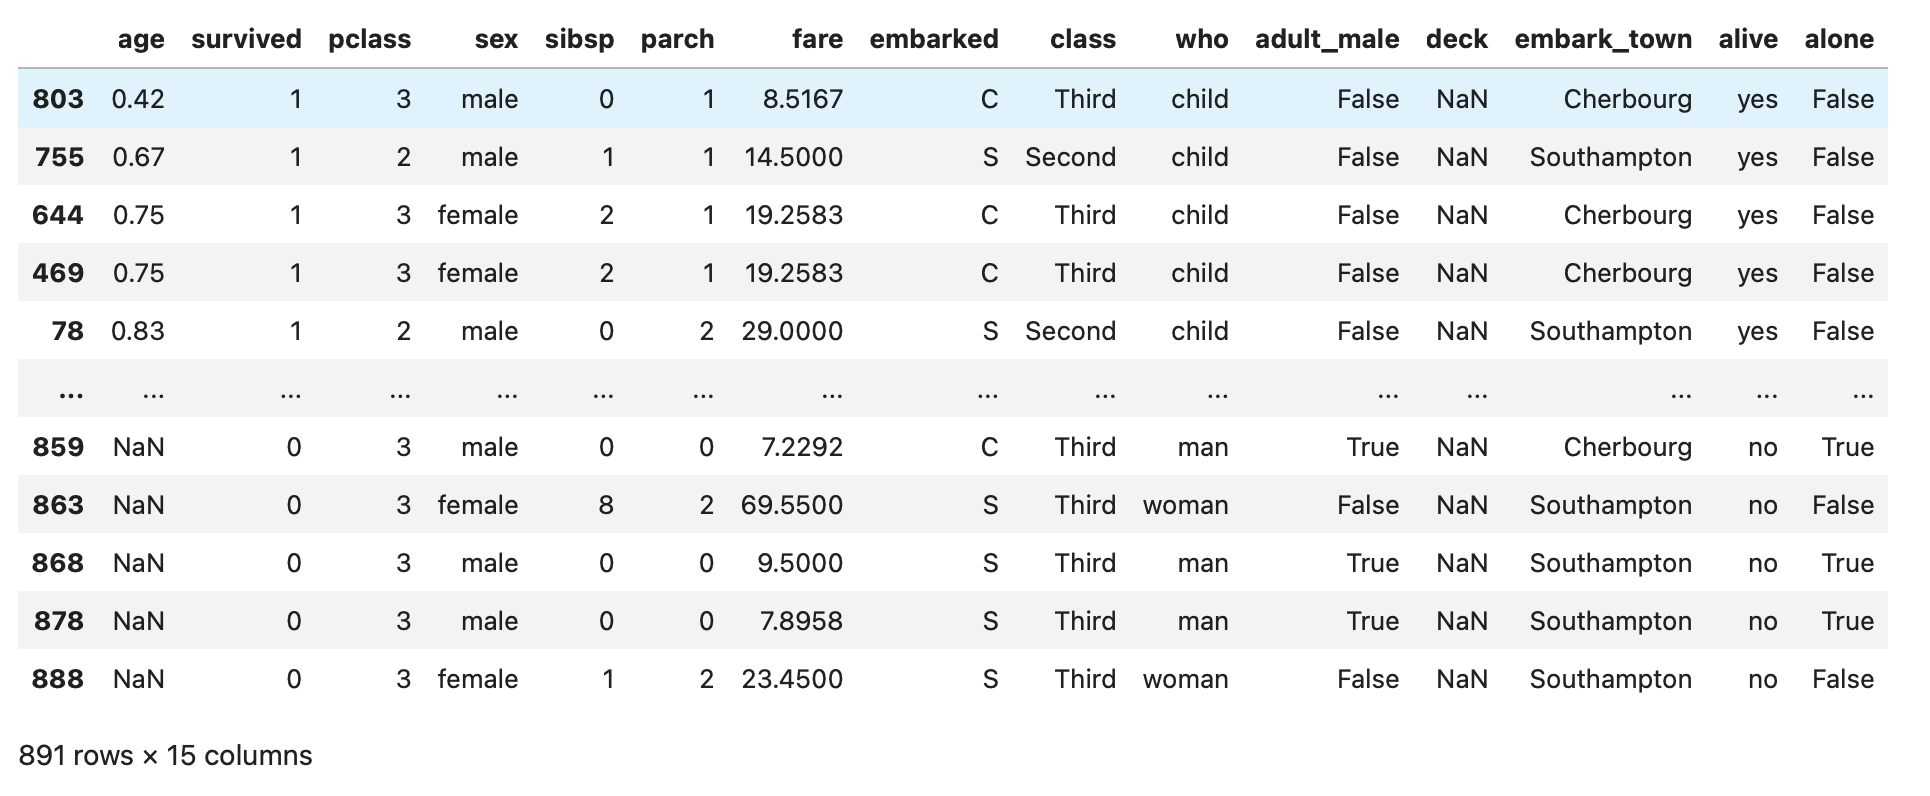

### 열 순서 변경(참고 수준으로 보세요~~)

In [64]:
columns = list(data.columns.values)
print(columns, '\n')

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'] 



컬럼이 많으니 몇개로만 추려서...

In [40]:
data4 = data.loc[0:5, "survived":"age"]
# 다시 설정
columns = list(data4.columns.values)
print(columns, '\n')

['survived', 'pclass', 'sex', 'age'] 



열이름이 알파벳 순서로 정렬되는 것을 확인

In [41]:
columns_sorted = sorted(columns)
data_sorted = data4[columns_sorted]
data_sorted

age  pclass     sex  survived
0  22.0       3    male         0
1  38.0       1  female         1
2  26.0       3  female         1
3  35.0       1  female         1
4  35.0       3    male         0
5   NaN       3    male         0

columns에 대한 역순

In [42]:
columns_reversed = list(reversed(columns))
data_reversed = data4[columns_reversed]
data_reversed

age     sex  pclass  survived
0  22.0    male       3         0
1  38.0  female       1         1
2  26.0  female       3         1
3  35.0  female       1         1
4  35.0    male       3         0
5   NaN    male       3         0

원하는 순서

In [43]:
columns_customed = ["pclass", "sex", "age", "survived"]
data_customed = data4[columns_customed]
data_customed

pclass     sex   age  survived
0       3    male  22.0         0
1       1  female  38.0         1
2       3  female  26.0         1
3       1  female  35.0         1
4       3    male  35.0         0
5       3    male   NaN         0

지금까지는 컬럼 순서를 바꿀 때마다 값들도 같이 따라 움직였죠? 그렇다면 값들은 그대로 두고 컬럼명만 바꾸고 싶을 땐 어떻게 해야 할까요?

In [44]:
data4.columns = ['pclass','age','gender','weight'] # 인덱스 바꿀 때 df.index = [~] 썼던거랑 비슷하죠?
data4


pclass  age  gender  weight
0       0    3    male    22.0
1       1    1  female    38.0
2       1    3  female    26.0
3       1    1  female    35.0
4       0    3    male    35.0
5       0    3    male     NaN

# 데이터 조작
## 데이터 추가/삭제

### Age_0 이라는 컬럼 생성

In [65]:
data2 = data.copy() # 원본이 수정되는 것을 방지하기 위해 복사본 생성
data2["Age_0"] = 0 # 새로운 칼럼을 생성하고 전체 값을 0으로 초기화합니다
data2.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  Age_0  
0    man        True  NaN  Southampton    no  False      0  
1  woman       False    C    Cherbourg   yes  False      0  
2  woman       False  NaN  Southampton   yes   True      0  
3  woman       False    C  Southampton   yes  False      0  
4    man        True  NaN  Southampton    no   True      0

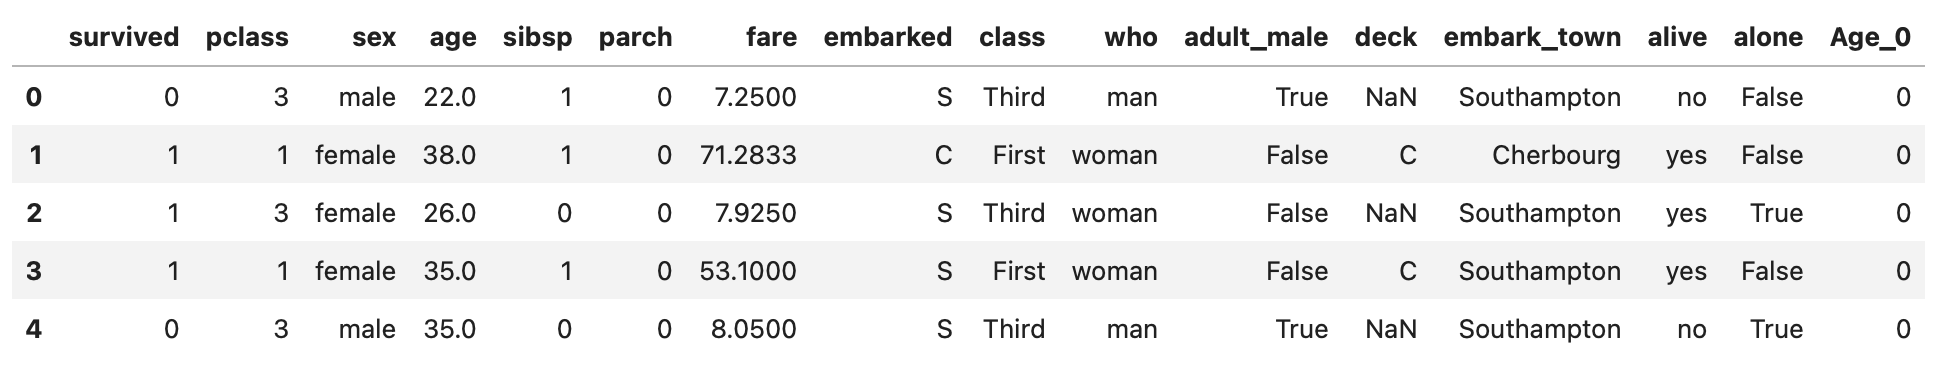

### 데이터프레임 연산

In [66]:
data2['Age_0'] = data2['Age_0'] + 100
data2.head(5)

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  Age_0  
0    man        True  NaN  Southampton    no  False    100  
1  woman       False    C    Cherbourg   yes  False    100  
2  woman       False  NaN  Southampton   yes   True    100  
3  woman       False    C  Southampton   yes  False    100  
4    man        True  NaN  Southampton    no   True    100

### 열을 삭제해주세요

In [67]:
# axis=*, inplace=True 옵션을 사용해주세요. 이 중 axis 옵션에 주의해주세요! 열을 삭제하려면 axis를 뭘 줘야 했죠?
data2.drop('Age_0', axis=1, inplace=True)
data2

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

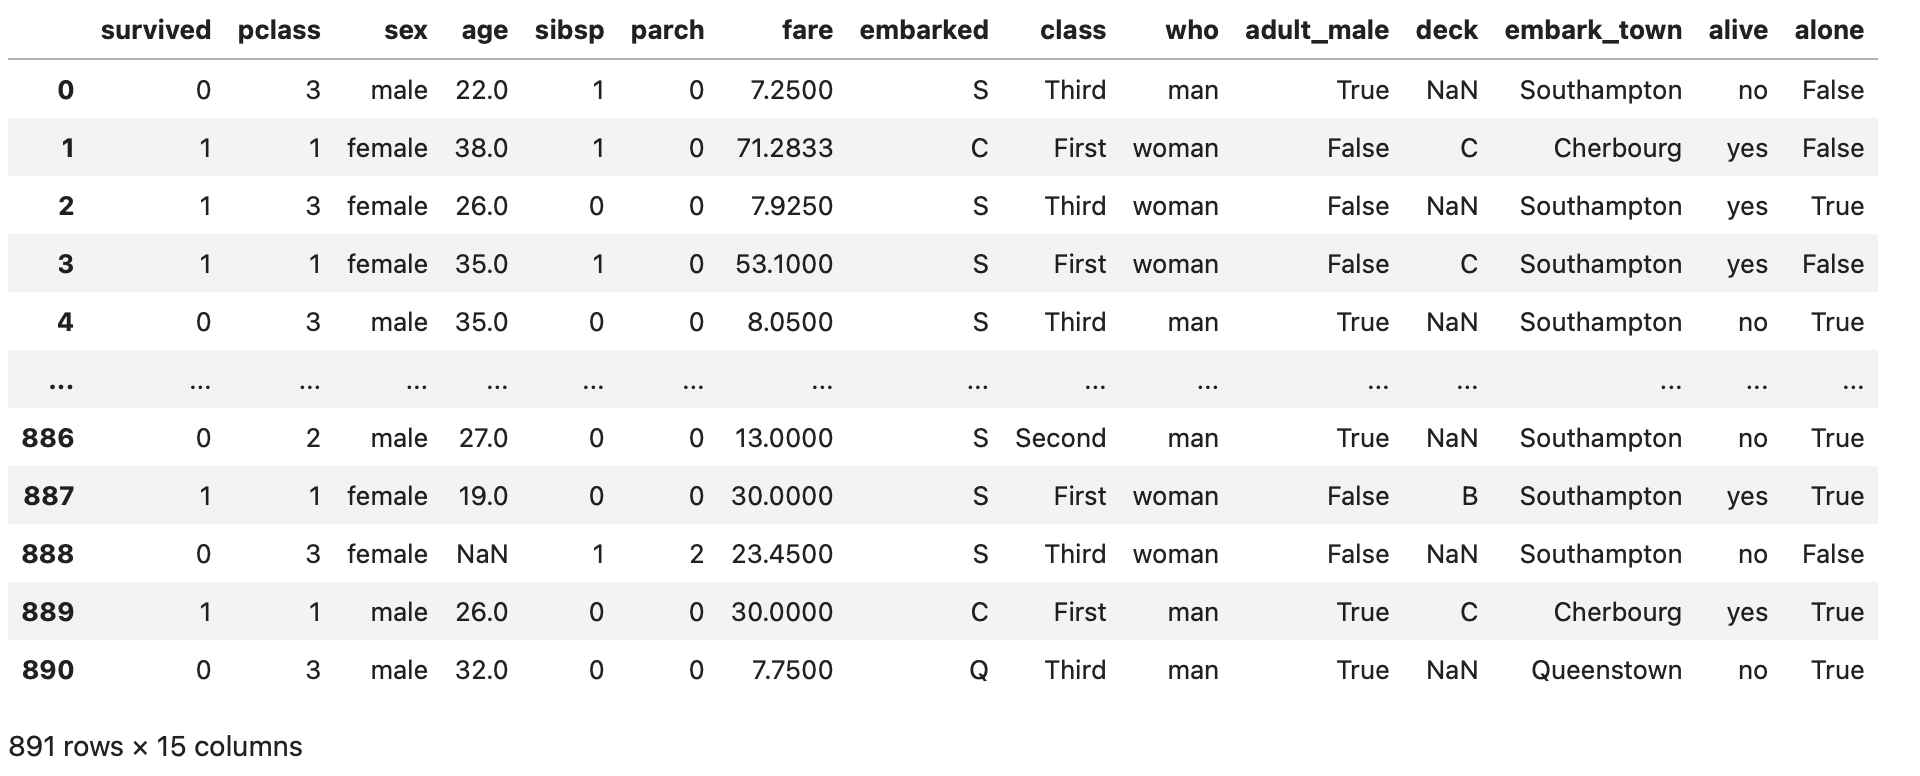

## 데이터 정렬

### 인덱스를 기준으로 데이터를 내림차순으로 정렬해주세요!

In [68]:
# ascending= 와 inplace=True 옵션을 사용해주세요
data2.sort_index(ascending=False, inplace=True)
data2

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
890         0       3    male  32.0      0      0   7.7500        Q   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
887         1       1  female  19.0      0      0  30.0000        S   First   
886         0       2    male  27.0      0      0  13.0000        S  Second   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
4           0       3    male  35.0      0      0   8.0500        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
0           0       3    male  22.0      1      0   7.2500        S   Third   

       who  adult_male deck  embark_town alive  alone  
890    man        True  NaN   Queenstown    no   True  
889    man        True    C    Cherbourg   yes   True  
888  woman       False  NaN  Southampton    no  False  
887  woman       False    B  Southampton   yes   True  
886    man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
4      man        True  NaN  Southampton    no   True  
3    woman       False    C  Southampton   yes  False  
2    woman       False  NaN  Southampton   yes   True  
1    woman       False    C    Cherbourg   yes  False  
0      man        True  NaN  Southampton    no  False  

[891 rows x 15 columns]

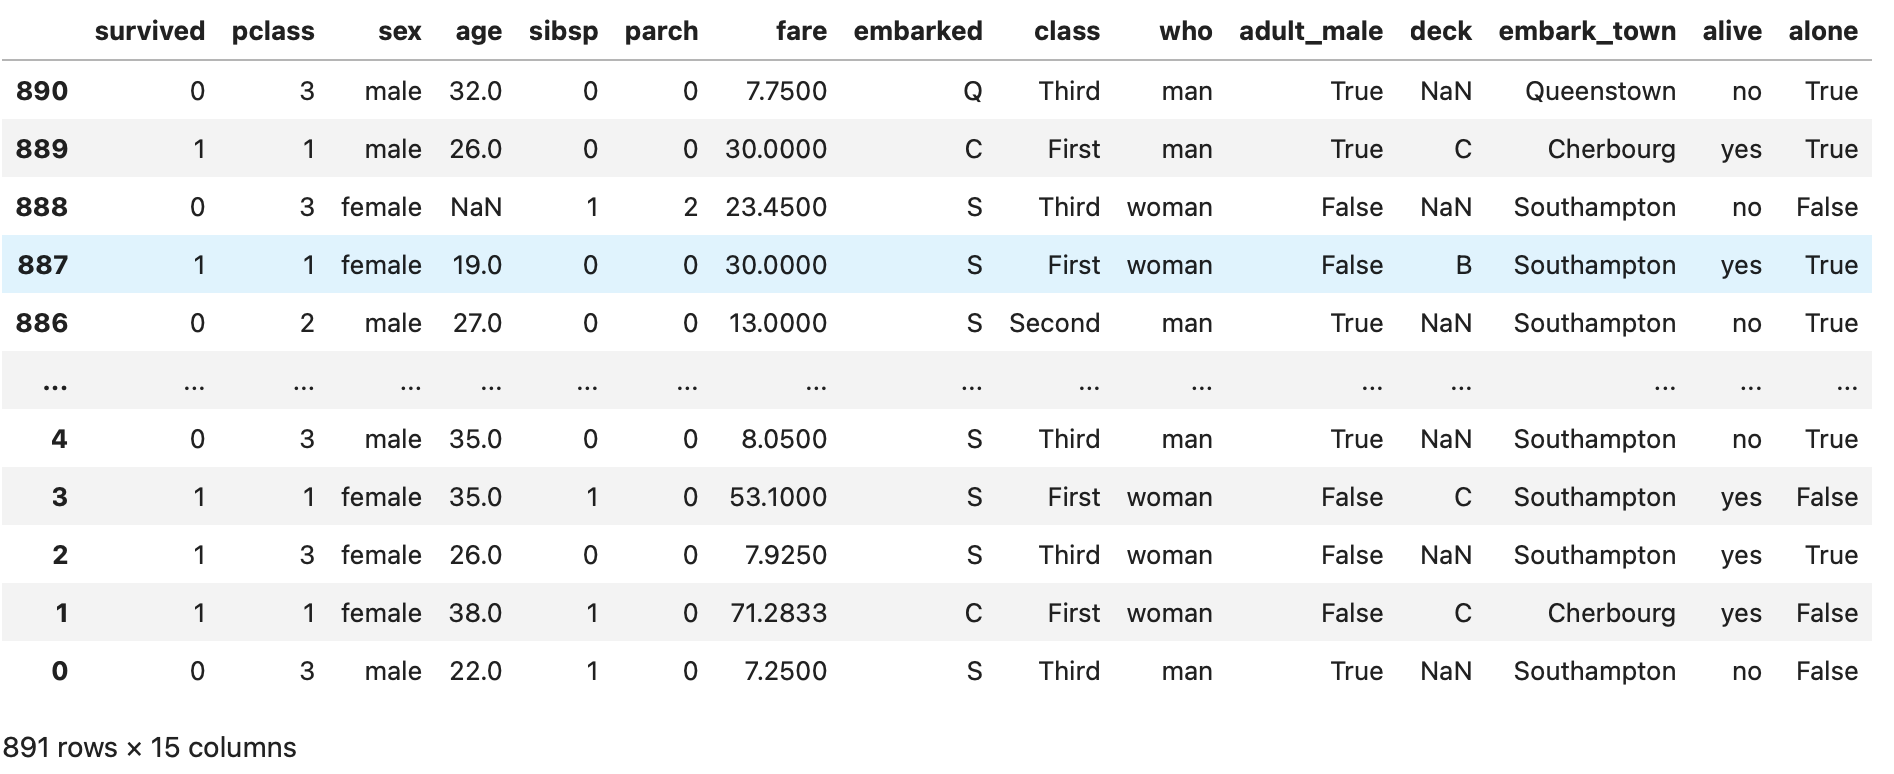

### 다시 원상복구를 시켜봅시다

In [69]:
data2.sort_index()

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

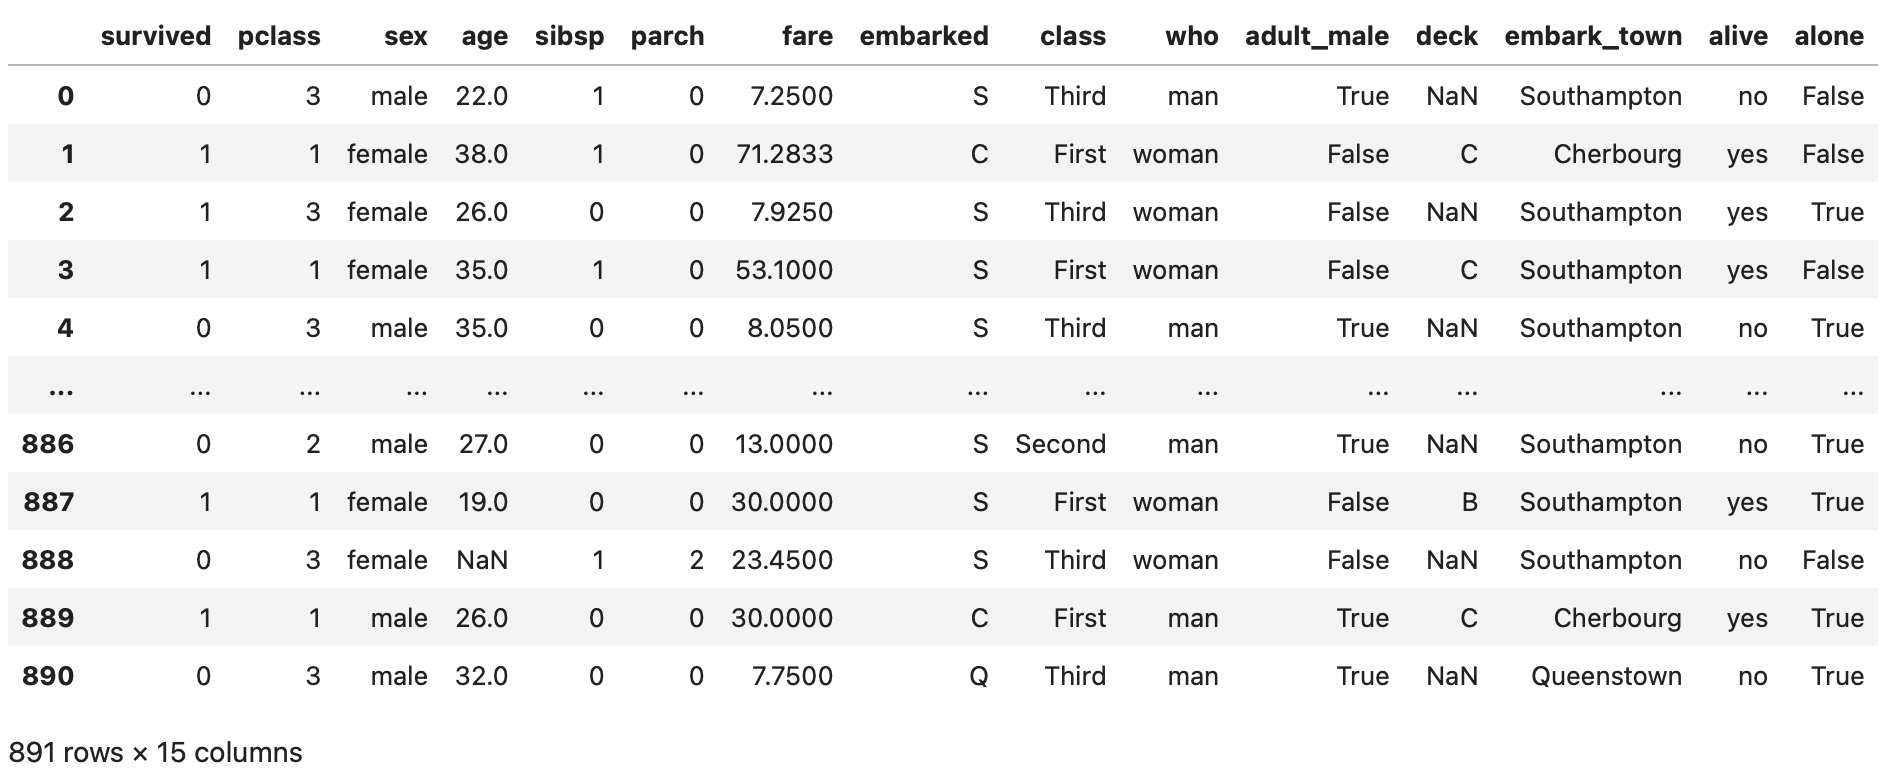

### embark_town을 기준으로 내림차순 정렬하고, 같은 값은 pclass를 기준으로 내림차순 정렬해주세요!

embark_town 열을 기준으로 내림차순을 하되, 만약 동일한 값이 있다면 그 부분에 대해서만 pclass 열을 따라 내림차순으로 정렬합니다.

In [70]:
# 여러 열을 기준으로 정렬을 할 때는, 리스트 형태로 인자를 전달해주면 됩니다!
titanic_sorted = data.sort_values(by=["embark_town","pclass"], ascending = [False, False])

titanic_sorted.head(3)

survived  pclass     sex   age  sibsp  parch   fare embarked  class    who  \
0         0       3    male  22.0      1      0  7.250        S  Third    man   
2         1       3  female  26.0      0      0  7.925        S  Third  woman   
4         0       3    male  35.0      0      0  8.050        S  Third    man   

   adult_male deck  embark_town alive  alone  
0        True  NaN  Southampton    no  False  
2       False  NaN  Southampton   yes   True  
4        True  NaN  Southampton    no   True

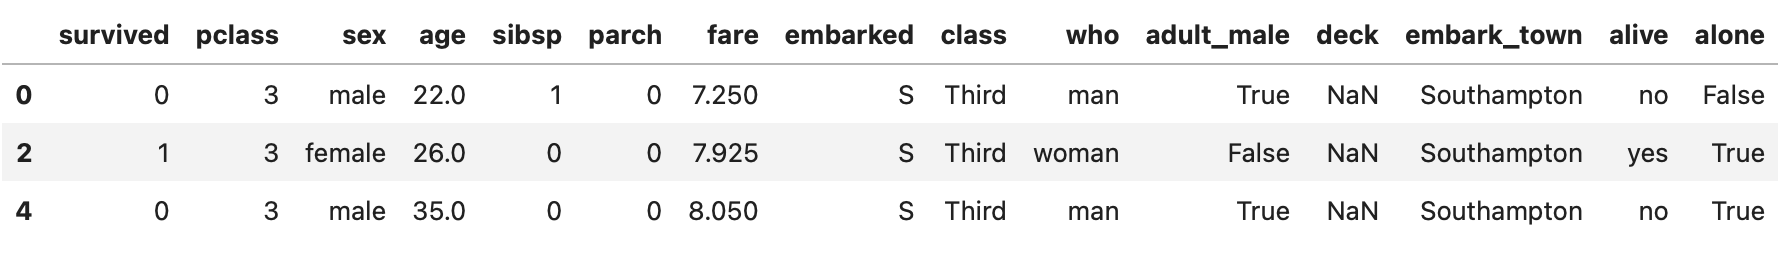

## 데이터프레임 병합
### concat을 사용해서 데이터프레임을 병합하는 연습을 진행해보아요

In [71]:
data3 = data.copy()
d1 = data3.iloc[0:100]
d2 = data3.iloc[700:800]
d1

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0          0       3    male  22.0      1      0   7.2500        S   Third   
1          1       1  female  38.0      1      0  71.2833        C   First   
2          1       3  female  26.0      0      0   7.9250        S   Third   
3          1       1  female  35.0      1      0  53.1000        S   First   
4          0       3    male  35.0      0      0   8.0500        S   Third   
..       ...     ...     ...   ...    ...    ...      ...      ...     ...   
95         0       3    male   NaN      0      0   8.0500        S   Third   
96         0       1    male  71.0      0      0  34.6542        C   First   
97         1       1    male  23.0      0      1  63.3583        C   First   
98         1       2  female  34.0      0      1  23.0000        S  Second   
99         0       2    male  34.0      1      0  26.0000        S  Second   

      who  adult_male deck  embark_town alive  alone  
0     man        True  NaN  Southampton    no  False  
1   woman       False    C    Cherbourg   yes  False  
2   woman       False  NaN  Southampton   yes   True  
3   woman       False    C  Southampton   yes  False  
4     man        True  NaN  Southampton    no   True  
..    ...         ...  ...          ...   ...    ...  
95    man        True  NaN  Southampton    no   True  
96    man        True    A    Cherbourg    no   True  
97    man        True    D    Cherbourg   yes  False  
98  woman       False  NaN  Southampton   yes  False  
99    man        True  NaN  Southampton    no  False  

[100 rows x 15 columns]

In [52]:
d2

survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
700         1       1  female  18.0      1      0  227.5250        C   First   
701         1       1    male  35.0      0      0   26.2875        S   First   
702         0       3  female  18.0      0      1   14.4542        C   Third   
703         0       3    male  25.0      0      0    7.7417        Q   Third   
704         0       3    male  26.0      1      0    7.8542        S   Third   
..        ...     ...     ...   ...    ...    ...       ...      ...     ...   
795         0       2    male  39.0      0      0   13.0000        S  Second   
796         1       1  female  49.0      0      0   25.9292        S   First   
797         1       3  female  31.0      0      0    8.6833        S   Third   
798         0       3    male  30.0      0      0    7.2292        C   Third   
799         0       3  female  30.0      1      1   24.1500        S   Third   

       who  adult_male deck  embark_town alive  alone  
700  woman       False    C    Cherbourg   yes  False  
701    man        True    E  Southampton   yes   True  
702  woman       False  NaN    Cherbourg    no  False  
703    man        True  NaN   Queenstown    no   True  
704    man        True  NaN  Southampton    no  False  
..     ...         ...  ...          ...   ...    ...  
795    man        True  NaN  Southampton    no   True  
796  woman       False    D  Southampton   yes   True  
797  woman       False  NaN  Southampton   yes   True  
798    man        True  NaN    Cherbourg    no   True  
799  woman       False  NaN  Southampton    no  False  

[100 rows x 15 columns]

In [73]:
#concat을 활용해 두 프레임을 병합힙니다! axis 방향도 주의해주세요!

concat_data = pd.concat([d1, d2], axis = 0)
concat_data

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
795         0       2    male  39.0      0      0  13.0000        S  Second   
796         1       1  female  49.0      0      0  25.9292        S   First   
797         1       3  female  31.0      0      0   8.6833        S   Third   
798         0       3    male  30.0      0      0   7.2292        C   Third   
799         0       3  female  30.0      1      1  24.1500        S   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
795    man        True  NaN  Southampton    no   True  
796  woman       False    D  Southampton   yes   True  
797  woman       False  NaN  Southampton   yes   True  
798    man        True  NaN    Cherbourg    no   True  
799  woman       False  NaN  Southampton    no  False  

[200 rows x 15 columns]

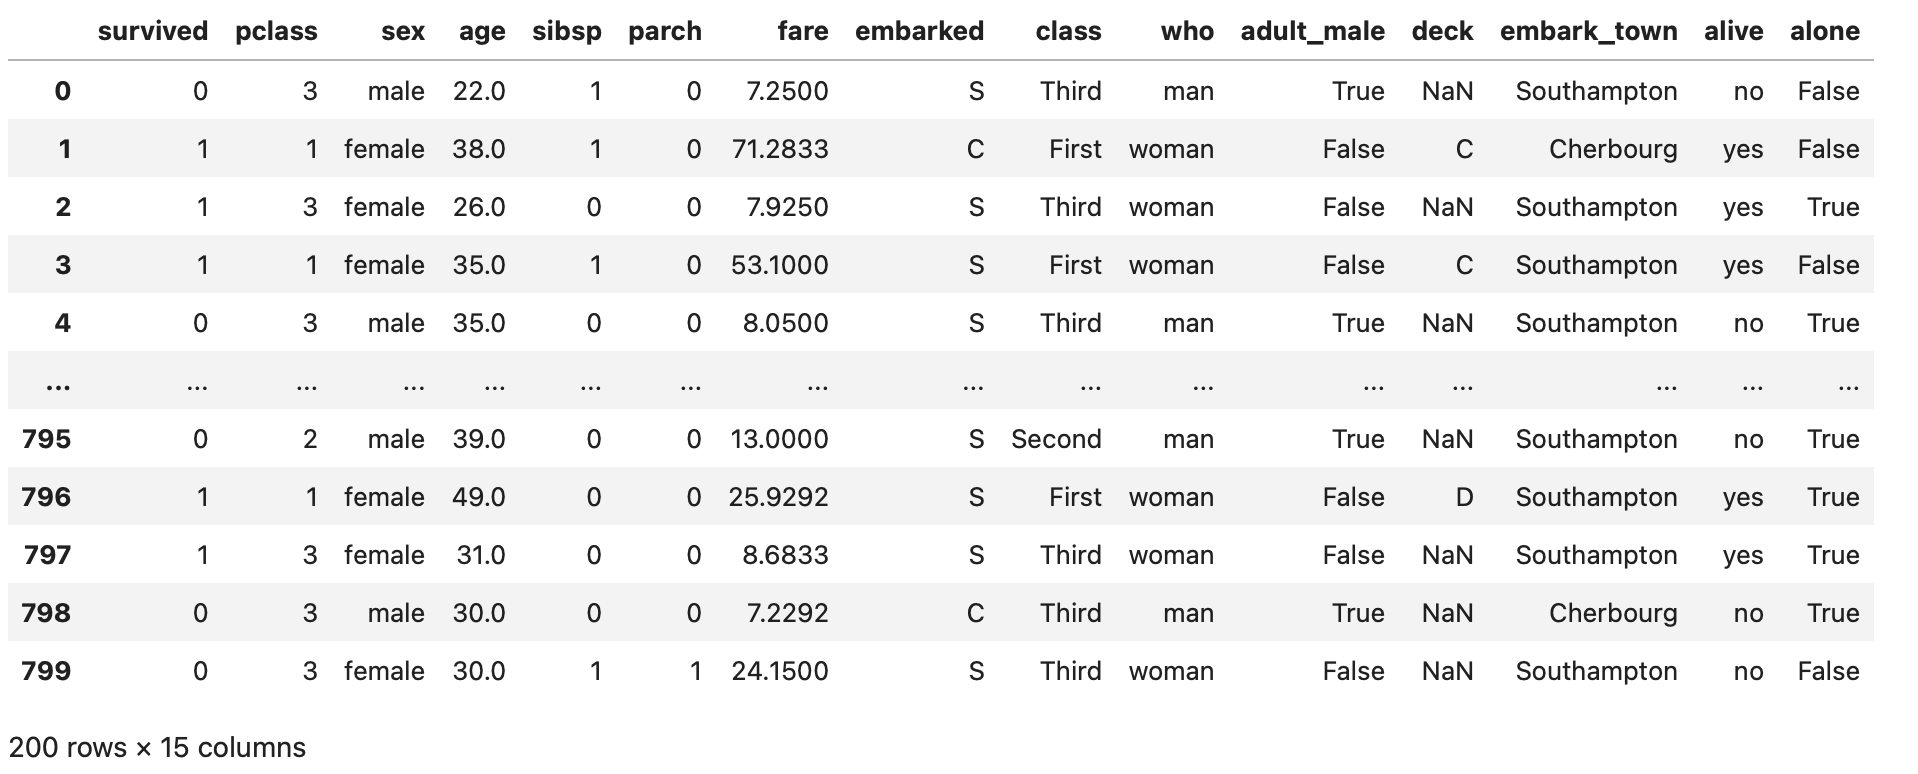

### 다음은 merge를 통해 공통 항목을 기준으로 병합을 해봅시다.  
서로 다른 데이터셋을 합칠때 가장 자주 사용하는 방식이니 꼭 기억하세요!

In [75]:
#바로 실행해보세요
d3 = data3.iloc[4:14, 3:12:3]
d4 = data3.iloc[10:18, 3:12:2]

d3

age     fare    who
4   35.0   8.0500    man
5    NaN   8.4583    man
6   54.0  51.8625    man
7    2.0  21.0750  child
8   27.0  11.1333  woman
9   14.0  30.0708  child
10   4.0  16.7000  child
11  58.0  26.5500  woman
12  20.0   8.0500    man
13  39.0  31.2750    man

In [76]:
d4

age  parch embarked    who deck
10   4.0      1        S  child    G
11  58.0      0        S  woman    C
12  20.0      0        S    man  NaN
13  39.0      5        S    man  NaN
14  14.0      0        S  child  NaN
15  55.0      0        S  woman  NaN
16   2.0      1        Q  child  NaN
17   NaN      0        S    man  NaN

In [77]:
#여기부터 문제입니다
# age 열을 기준으로 d3과 d4를 교집합 연산으로 합쳐봅시다
merge_data_inner= pd.merge(d3, d4, how='inner', on='age')

merge_data_inner

age     fare  who_x  parch embarked  who_y deck
0   NaN   8.4583    man      0        S    man  NaN
1   2.0  21.0750  child      1        Q  child  NaN
2  14.0  30.0708  child      0        S  child  NaN
3   4.0  16.7000  child      1        S  child    G
4  58.0  26.5500  woman      0        S  woman    C
5  20.0   8.0500    man      0        S    man  NaN
6  39.0  31.2750    man      5        S    man  NaN

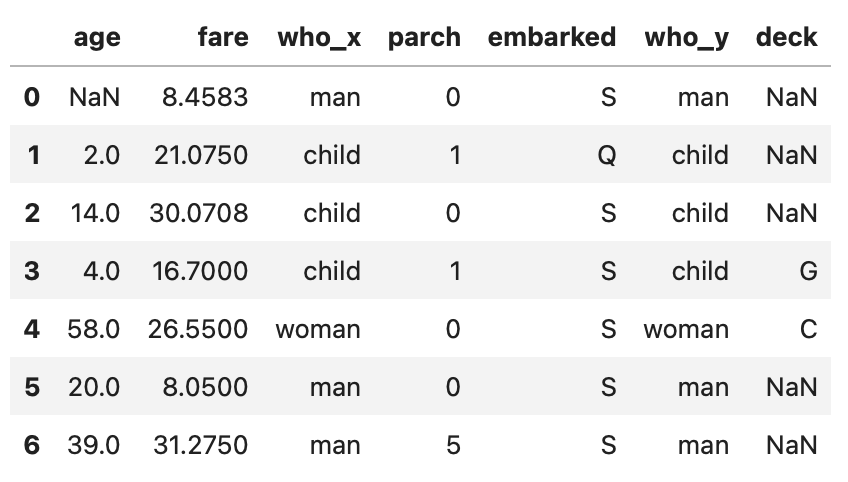

In [78]:
# 이번에는 age 열을 기준으로 d3과 d4를 합집합 연산으로 합쳐봅시다
merge_data_outer = pd.merge(d3, d4, how='outer', on='age')

merge_data_outer

age     fare  who_x  parch embarked  who_y deck
0    2.0  21.0750  child    1.0        Q  child  NaN
1    4.0  16.7000  child    1.0        S  child    G
2   14.0  30.0708  child    0.0        S  child  NaN
3   20.0   8.0500    man    0.0        S    man  NaN
4   27.0  11.1333  woman    NaN      NaN    NaN  NaN
5   35.0   8.0500    man    NaN      NaN    NaN  NaN
6   39.0  31.2750    man    5.0        S    man  NaN
7   54.0  51.8625    man    NaN      NaN    NaN  NaN
8   55.0      NaN    NaN    0.0        S  woman  NaN
9   58.0  26.5500  woman    0.0        S  woman    C
10   NaN   8.4583    man    0.0        S    man  NaN

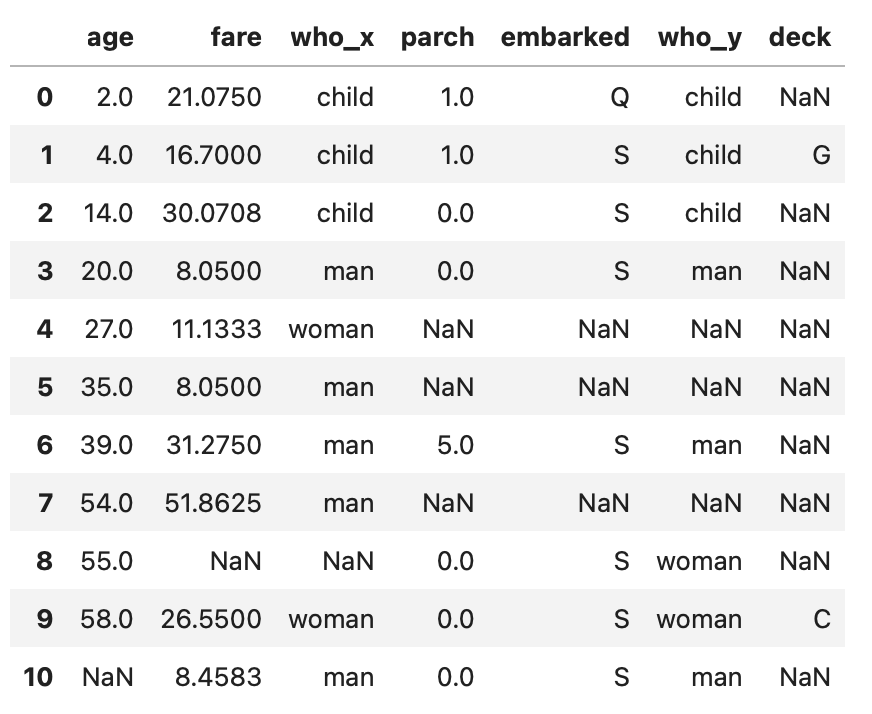

# 집계함수와 그룹화

## 집계 함수

In [79]:
#count(), min(), max(), sum(), mean() 등
data.count() # axis = 0이 default 값으로 설정되어 있습니다.

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [80]:
data[["age","fare"]].mean() # axis = 0이 default 값으로 설정되어 있습니다.

age     29.699118
fare    32.204208
dtype: float64

### GroupBy() 적용

In [81]:
data_groupby = data.groupby("pclass") # groupby만 사용하면 그룹화된 객체가 생성되지만, 이 자체만으로는 알 수 있는게 없습니다!
print(type(data_groupby))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [82]:
data_groupby.count() # 따라서 groupby를 통해 인사이트를 얻으려면 집계함수와 같이 사용해줘야 합니다.

survived  sex  age  sibsp  parch  fare  embarked  class  who  \
pclass                                                                 
1            216  216  186    216    216   216       214    216  216   
2            184  184  173    184    184   184       184    184  184   
3            491  491  355    491    491   491       491    491  491   

        adult_male  deck  embark_town  alive  alone  
pclass                                               
1              216   175          214    216    216  
2              184    16          184    184    184  
3              491    12          491    491    491

In [83]:
data.groupby(['pclass', 'survived']).size()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

바로 위 처럼 말이죠!!

In [84]:
# DataFrameGroupBy 객체에 [["pclass", "survived"]]로 필터링해서 count() 옵션을 걸어보는 코드입니다
data_groupby = data.groupby('pclass')[['pclass','survived']].count()
data_groupby

pclass  survived
pclass                  
1          216       216
2          184       184
3          491       491

In [85]:
#agg()를 이용해 여러 함수를 동시에 구현도 가능
agg_format = {"age":"max", "sibsp":"sum", "fare":"mean"}
data.groupby("pclass").agg(agg_format)

age  sibsp       fare
pclass                        
1       80.0     90  84.154687
2       70.0     74  20.662183
3       74.0    302  13.675550

고생하셨습니다!